In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier


#####
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score


In [2]:
def df_Y2Ypredict(ruta):
    f = open(ruta)
    lines = f.readlines()
    num_epocas = int(str(lines[2][:-1]).split(' ')[-1]) #
    performance_train = float(str(lines[3]).split(' ')[-1])#
    performance_evalu = float(str(lines[4]).split(' ')[-1])#
    df_y_yPredict = pd.DataFrame([str(lines[8:-5][i]).split('\t') for i in range(len(lines[8:-5]))])
    temp = df_y_yPredict[4]
    temp = [int(temp[i]) for i in range(len(temp))]
    df_y_yPredict[4] = temp#
    accuracy = float(str(lines[-4]).split(' ')[-1])#
    df_y_yPredict = df_y_yPredict[[1,2,3,4]]
    df_y_yPredict.columns = ['v_input','v_predict','v_output','error']
    return num_epocas,performance_train, performance_evalu, df_y_yPredict, accuracy
    

In [80]:
labels = ['{0:06b}'.format(i) for i in range(2**6)]

In [81]:
#ruta_train = '../DATASET-10_6/dataset0/train0.csv'
#ruta_test = '../DATASET-10_6/dataset0/test0.csv'
def elementString2Vector(ruta_train,ruta_test):
    df_train = pd.read_csv(ruta_train,header=None,skiprows=1,sep='\t')
    df_train.columns=['graph','sub_graph']

    df_train['graph'] = [str(df_train['graph'][i]).zfill(10) for i in range(len(df_train['graph']))]
    df_train['sub_graph'] = [str(df_train['sub_graph'][i]).zfill(6) for i in range(len(df_train['sub_graph']))]

    df_train['graph']=[[int(df_train['graph'][j][i]) for i in range(len(df_train['graph'][j]))] for j in range(len(df_train['graph']))]
    df_train['sub_graph']=[[int(df_train['sub_graph'][j][i]) for i in range(len(df_train['sub_graph'][j]))] for j in range(len(df_train['sub_graph']))]

    ################

    df_test = pd.read_csv(ruta_test,header=None,skiprows=1,sep='\t')
    df_test.columns=['graph','sub_graph']

    df_test['graph'] = [str(df_test['graph'][i]).zfill(10) for i in range(len(df_test['graph']))]
    df_test['sub_graph'] = [str(df_test['sub_graph'][i]).zfill(6) for i in range(len(df_test['sub_graph']))]

    df_test['graph']=[[int(df_test['graph'][j][i]) for i in range(len(df_test['graph'][j]))] for j in range(len(df_test['graph']))]
    df_test['sub_graph']=[[int(df_test['sub_graph'][j][i]) for i in range(len(df_test['sub_graph'][j]))] for j in range(len(df_test['sub_graph']))]
    
    return df_train,df_test


def get_y_true_pred_2_str(df,model):
    y_true = [(''.join(map(str, df['sub_graph'][i]))) for i in range(len(df['sub_graph']))]
    y_pred = model.predict(list(df['graph']))
    y_pred = [(''.join(map(str, y_pred[i]))) for i in range(len(y_pred))]
    return y_true,y_pred

def get_y_true_pred_2_vec(df,model):
    y_true = df['sub_graph']
    y_pred = model.predict(list(df['graph']))    
    return y_true,y_pred


def plot_cm(cm, name,labels):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 25
    fig_size[1] = 20
    plt.rcParams["figure.figsize"] = fig_size
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    #plt.title('Confusion matrix of the classifier')

    # labels, title and ticks
    ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
    title='Confusion Matrix - '+name
    ax.set_title(title); 
    ax.xaxis.set_ticklabels(labels,rotation='vertical');
    ax.yaxis.set_ticklabels(labels,rotation='horizontal');

def print_report_model(y_true,y_pred,name):
    t = "\n\n******************** "+name+" ******************** \n\n"
    print(t)
    print(classification_report(y_true,y_pred))

In [22]:
ruta_train = '../DATASET-10_6/dataset0/train0.csv'
ruta_test = '../DATASET-10_6/dataset0/test0.csv'
df_train_0, df_test_0 = elementString2Vector(ruta_train,ruta_test)

In [23]:
cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1,activation='logistic')

In [24]:
cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 6), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
y_train_true = [(''.join(map(str, df_train_0['sub_graph'][i]))) for i in range(len(df_train_0['sub_graph']))]
y_train_pred = cls.predict(list(df_train_0['graph']))
y_train_pred = [(''.join(map(str, y_train_pred[i]))) for i in range(len(y_train_pred))]

In [36]:
cm_train = confusion_matrix(y_train_true,y_train_pred)

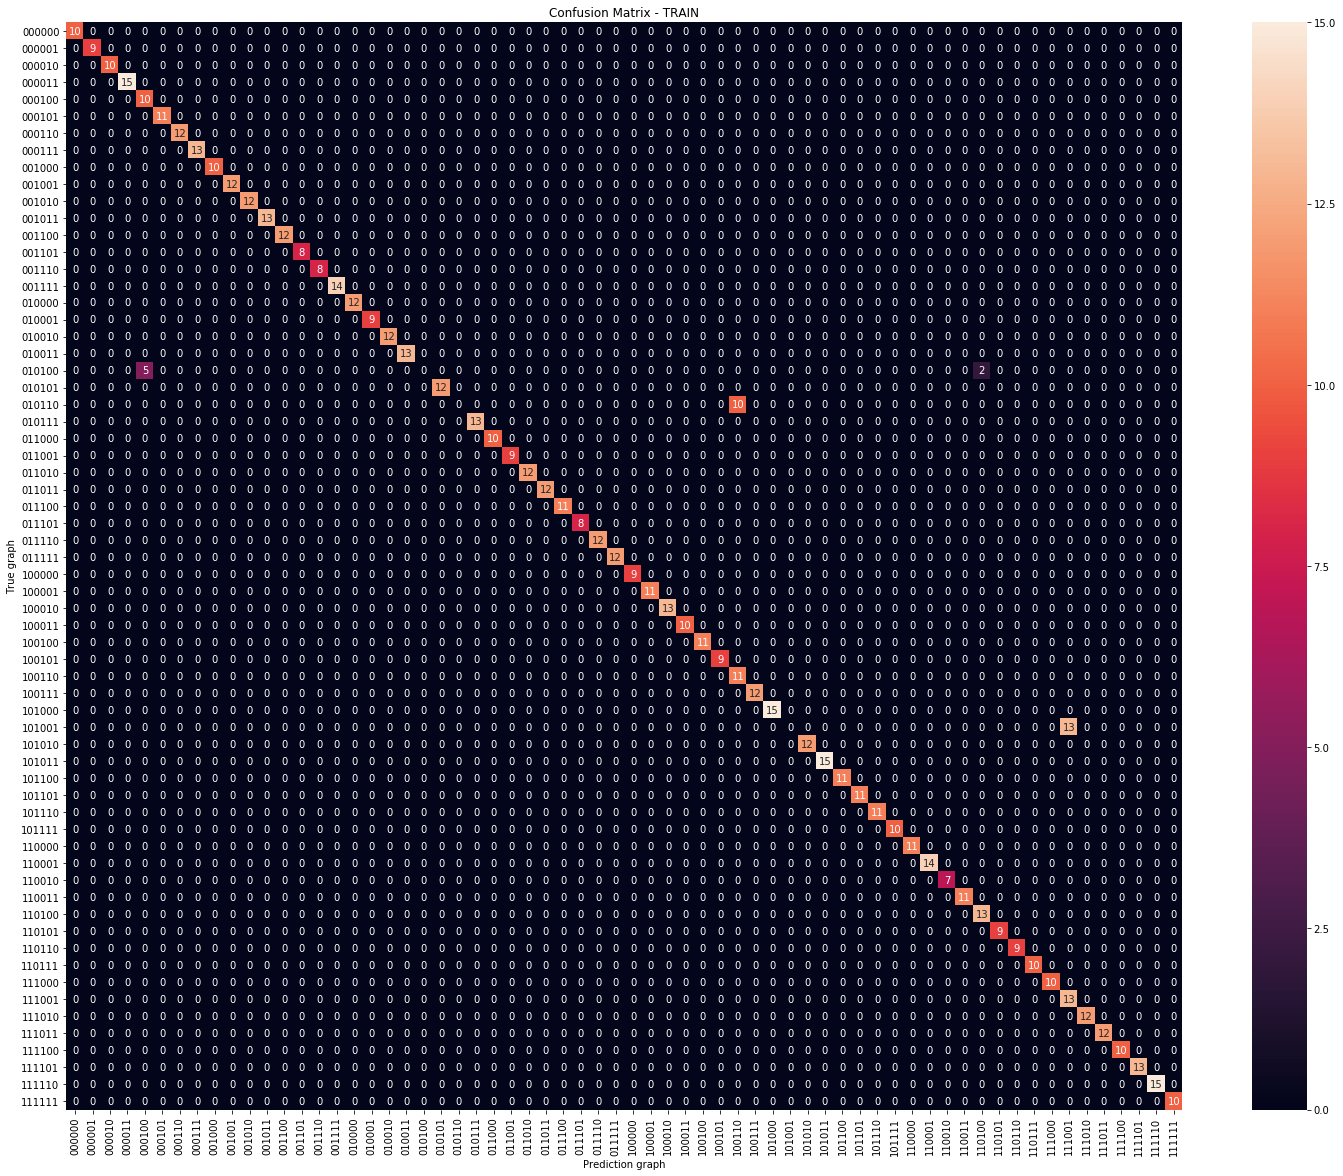

In [37]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size



ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax); #annot=True to annotate cells

plt.title('Confusion matrix of the classifier')

# labels, title and ticks
ax.set_xlabel('Prediction graph');ax.set_ylabel('True graph'); 
ax.set_title('Confusion Matrix - TRAIN'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical');
ax.yaxis.set_ticklabels(labels,rotation='horizontal');

# dataset0



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       0.67      1.00      0.80        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


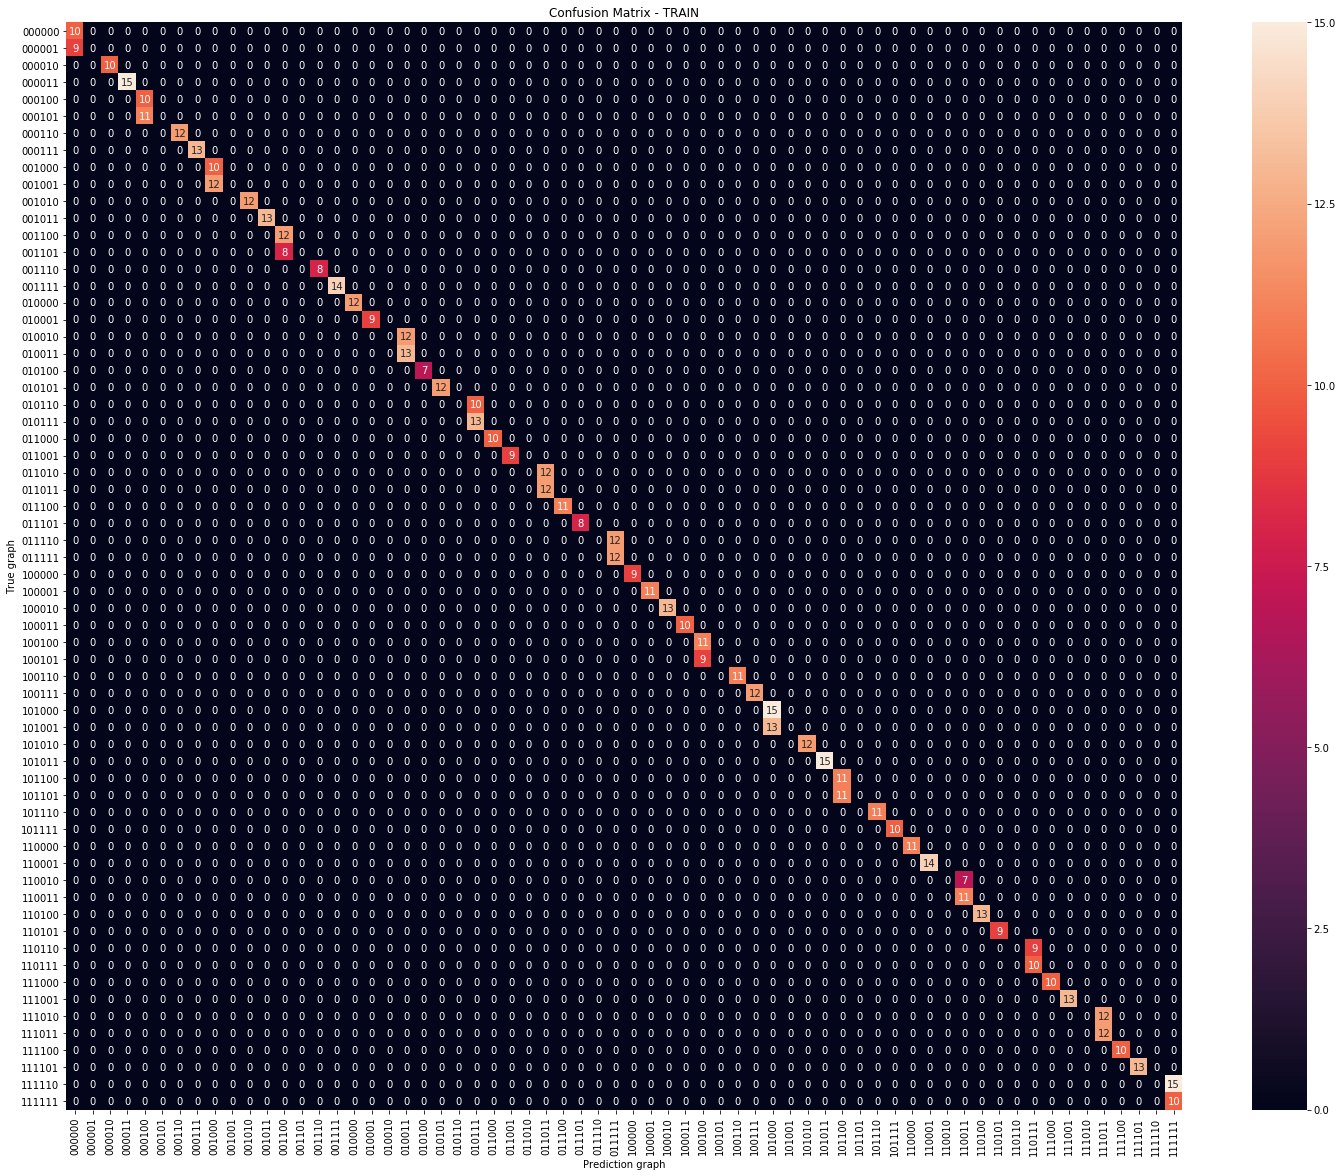

In [127]:
ruta_train = '../DATASET-10_6/dataset0/train0.csv'
ruta_test = '../DATASET-10_6/dataset0/test0.csv'



df_train_0, df_test_0 = elementString2Vector(ruta_train,ruta_test)

cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1,activation='logistic')

param = cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))

#print(param)

# Train
y_train_true_str,y_train_pred_str = get_y_true_pred_2_str(df_train_0,cls)
y_train_true_vect,y_train_pred_vect = get_y_true_pred_2_vec(df_train_0,cls)

cm_train = confusion_matrix(y_train_true_str,y_train_pred_str)

plot_cm(cm_train,"TRAIN",labels)

print_report_model(y_train_true,y_train_pred,"TRAIN")




******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       0.50      1.00      0.67         6
      000101       1.00      0.60      0.75         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


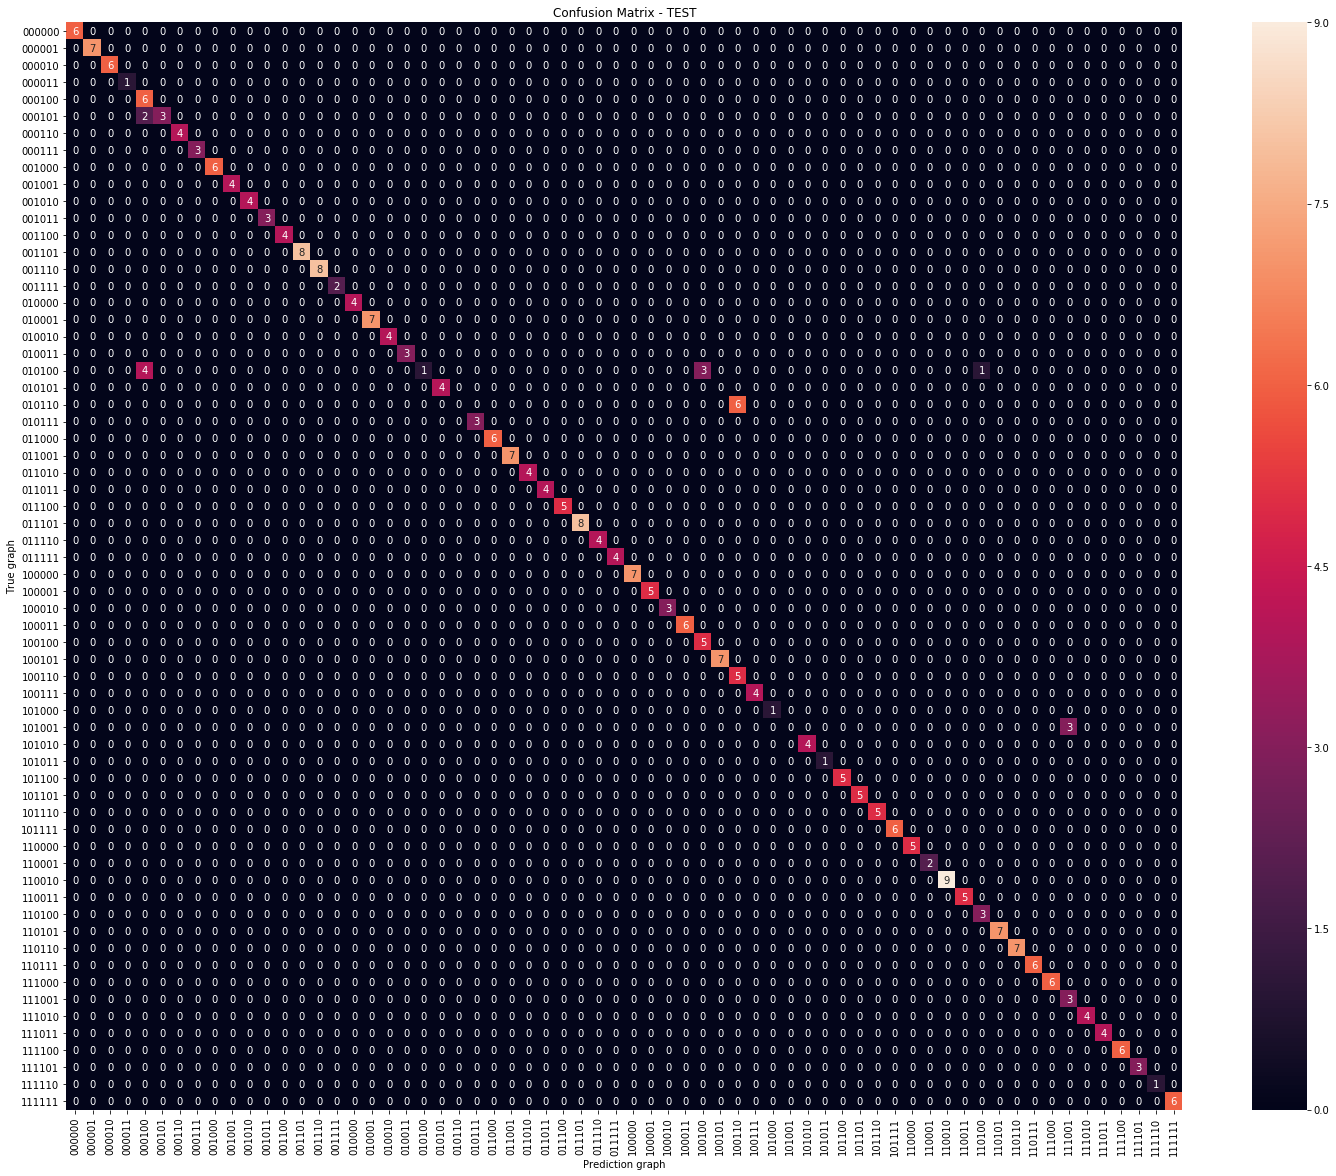

In [128]:

# Test
y_test_true_str,y_test_pred_str = get_y_true_pred_2_str(df_test_0,cls)
y_test_true_vect,y_test_pred_vect = get_y_true_pred_2_vec(df_test_0,cls)

cm_test = confusion_matrix(y_test_true,y_test_pred)

plot_cm(cm_test,"TEST",labels)

print_report_model(y_test_true,y_test_pred,"TEST")



nn_train_ha_0 = sum(np.diag(1-cdist(np.array(list(df_train_0['sub_graph'])), y_train_pred_vect, 'hamming')))/len(y_train_pred_vect)
nn_train_ac_0 = accuracy_score( np.array(list(df_train_0['sub_graph'])) ,  y_train_pred_vect ) 

nn_test_ha_0 = sum(np.diag(1-cdist(list(df_test_0['sub_graph']), y_test_pred_vect, 'hamming')))/len(y_test_pred_vect)
nn_test_ac_0 = accuracy_score( np.array(list(df_test_0['sub_graph'])) ,  y_test_pred_vect ) 



# dataset1



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       0.67      1.00      0.80        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


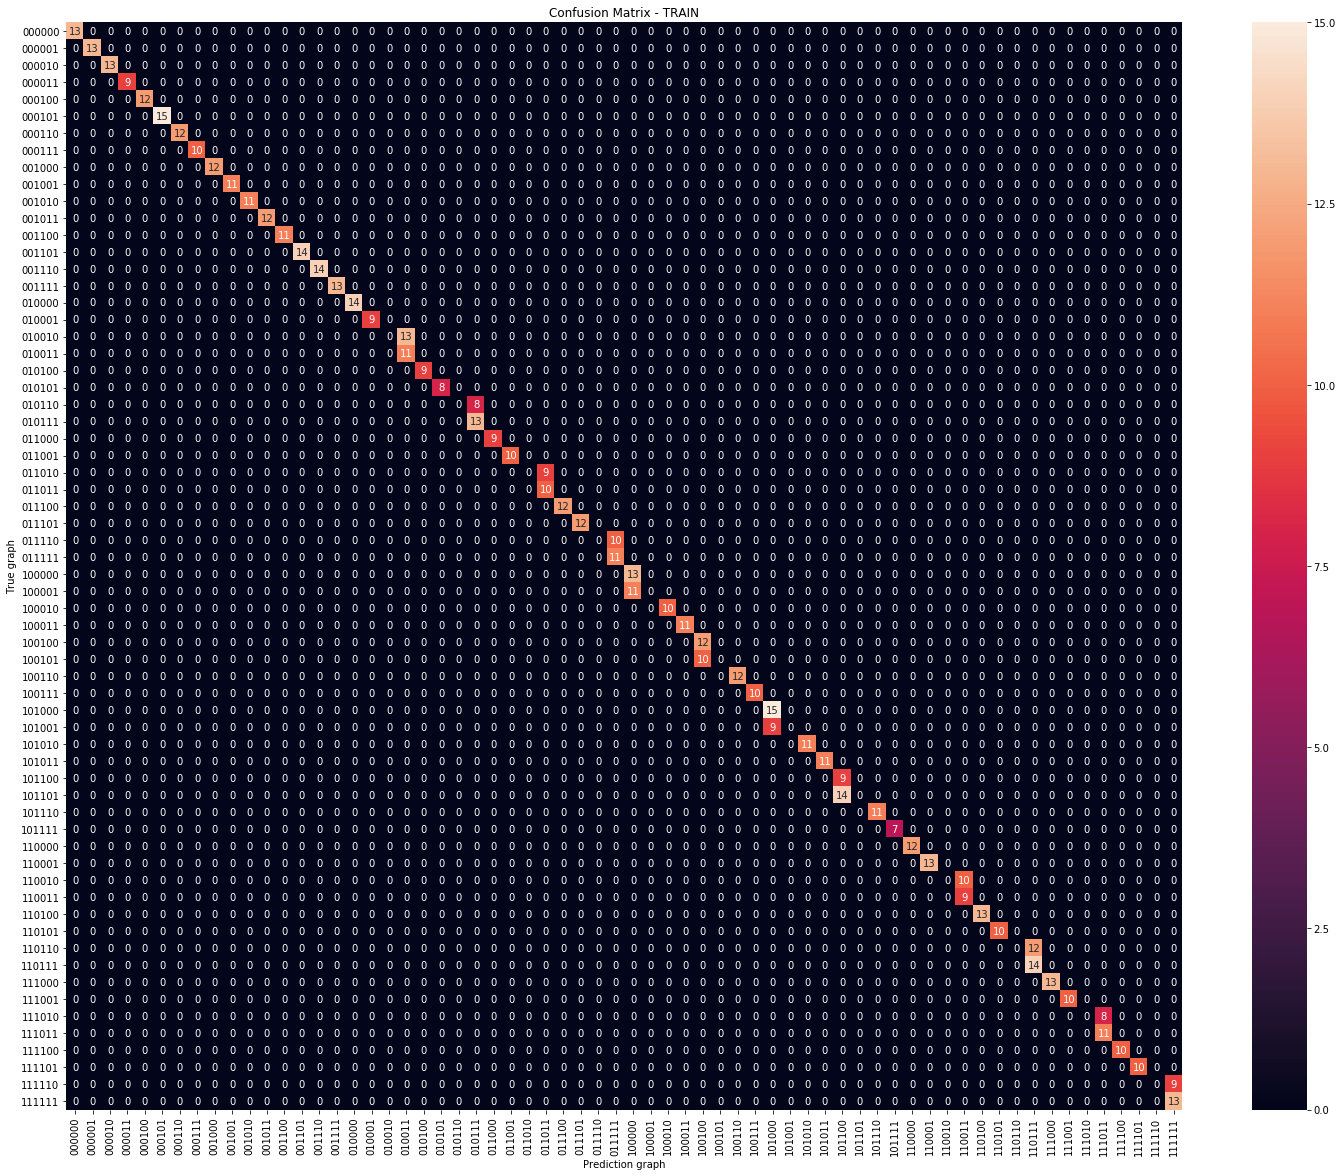

In [129]:
ruta_train = '../DATASET-10_6/dataset1/train1.csv'
ruta_test = '../DATASET-10_6/dataset1/test1.csv'



df_train_0, df_test_0 = elementString2Vector(ruta_train,ruta_test)

cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1,activation='logistic')

param = cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))

#print(param)

# Train
y_train_true_str,y_train_pred_str = get_y_true_pred_2_str(df_train_0,cls)
y_train_true_vect,y_train_pred_vect = get_y_true_pred_2_vec(df_train_0,cls)

cm_train = confusion_matrix(y_train_true_str,y_train_pred_str)

plot_cm(cm_train,"TRAIN",labels)

print_report_model(y_train_true,y_train_pred,"TRAIN")




******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       0.50      1.00      0.67         6
      000101       1.00      0.60      0.75         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


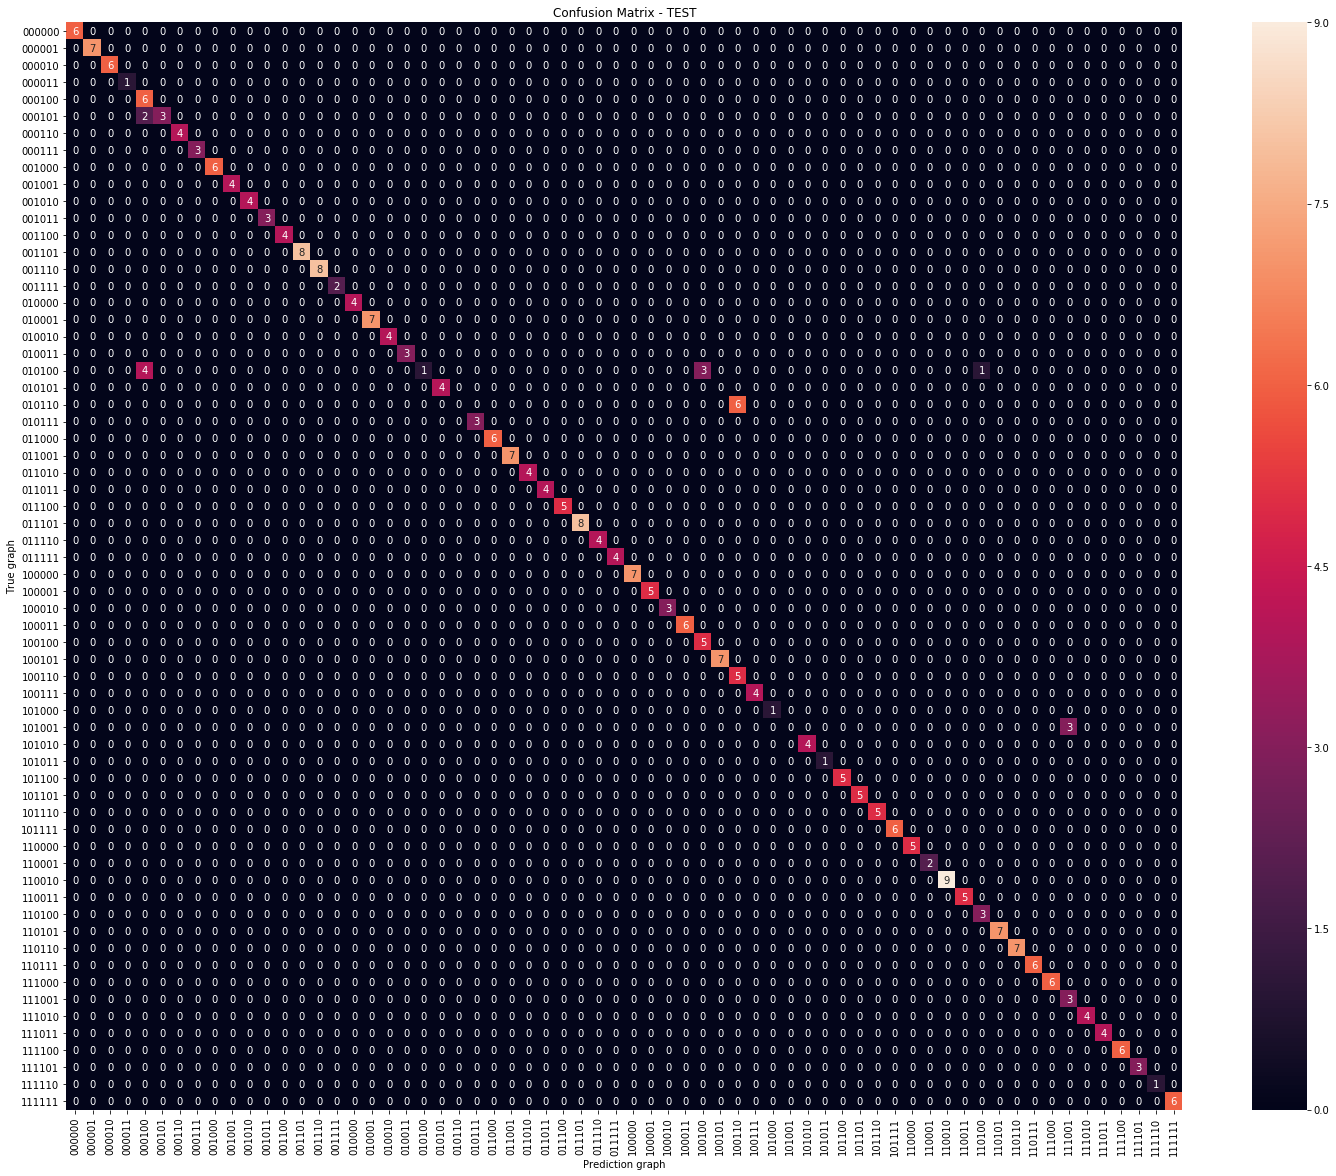

In [130]:

# Test
y_test_true_str,y_test_pred_str = get_y_true_pred_2_str(df_test_0,cls)
y_test_true_vect,y_test_pred_vect = get_y_true_pred_2_vec(df_test_0,cls)

cm_test = confusion_matrix(y_test_true,y_test_pred)

plot_cm(cm_test,"TEST",labels)

print_report_model(y_test_true,y_test_pred,"TEST")



nn_train_ha_1 = sum(np.diag(1-cdist(np.array(list(df_train_0['sub_graph'])), y_train_pred_vect, 'hamming')))/len(y_train_pred_vect)
nn_train_ac_1 = accuracy_score( np.array(list(df_train_0['sub_graph'])) ,  y_train_pred_vect ) 

nn_test_ha_1 = sum(np.diag(1-cdist(list(df_test_0['sub_graph']), y_test_pred_vect, 'hamming')))/len(y_test_pred_vect)
nn_test_ac_1 = accuracy_score( np.array(list(df_test_0['sub_graph'])) ,  y_test_pred_vect ) 



# dataset2



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       0.67      1.00      0.80        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


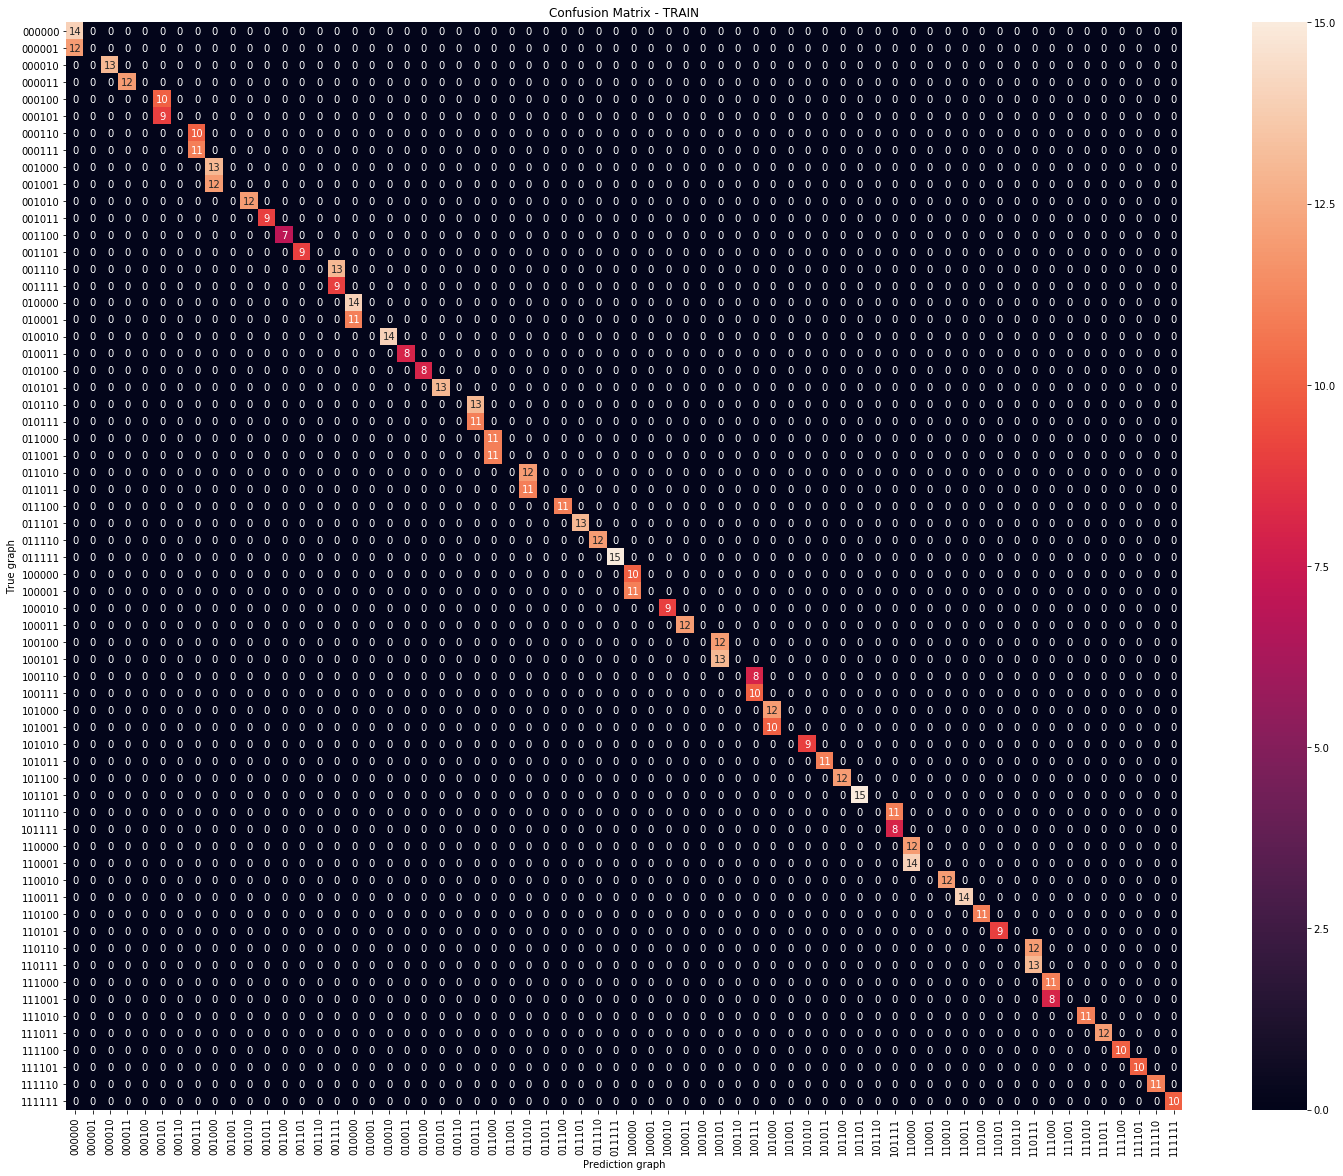

In [131]:
ruta_train = '../DATASET-10_6/dataset2/train2.csv'
ruta_test = '../DATASET-10_6/dataset2/test2.csv'



df_train_0, df_test_0 = elementString2Vector(ruta_train,ruta_test)

cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1,activation='logistic')

param = cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))

#print(param)

# Train
y_train_true_str,y_train_pred_str = get_y_true_pred_2_str(df_train_0,cls)
y_train_true_vect,y_train_pred_vect = get_y_true_pred_2_vec(df_train_0,cls)

cm_train = confusion_matrix(y_train_true_str,y_train_pred_str)

plot_cm(cm_train,"TRAIN",labels)

print_report_model(y_train_true,y_train_pred,"TRAIN")




******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       0.50      1.00      0.67         6
      000101       1.00      0.60      0.75         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


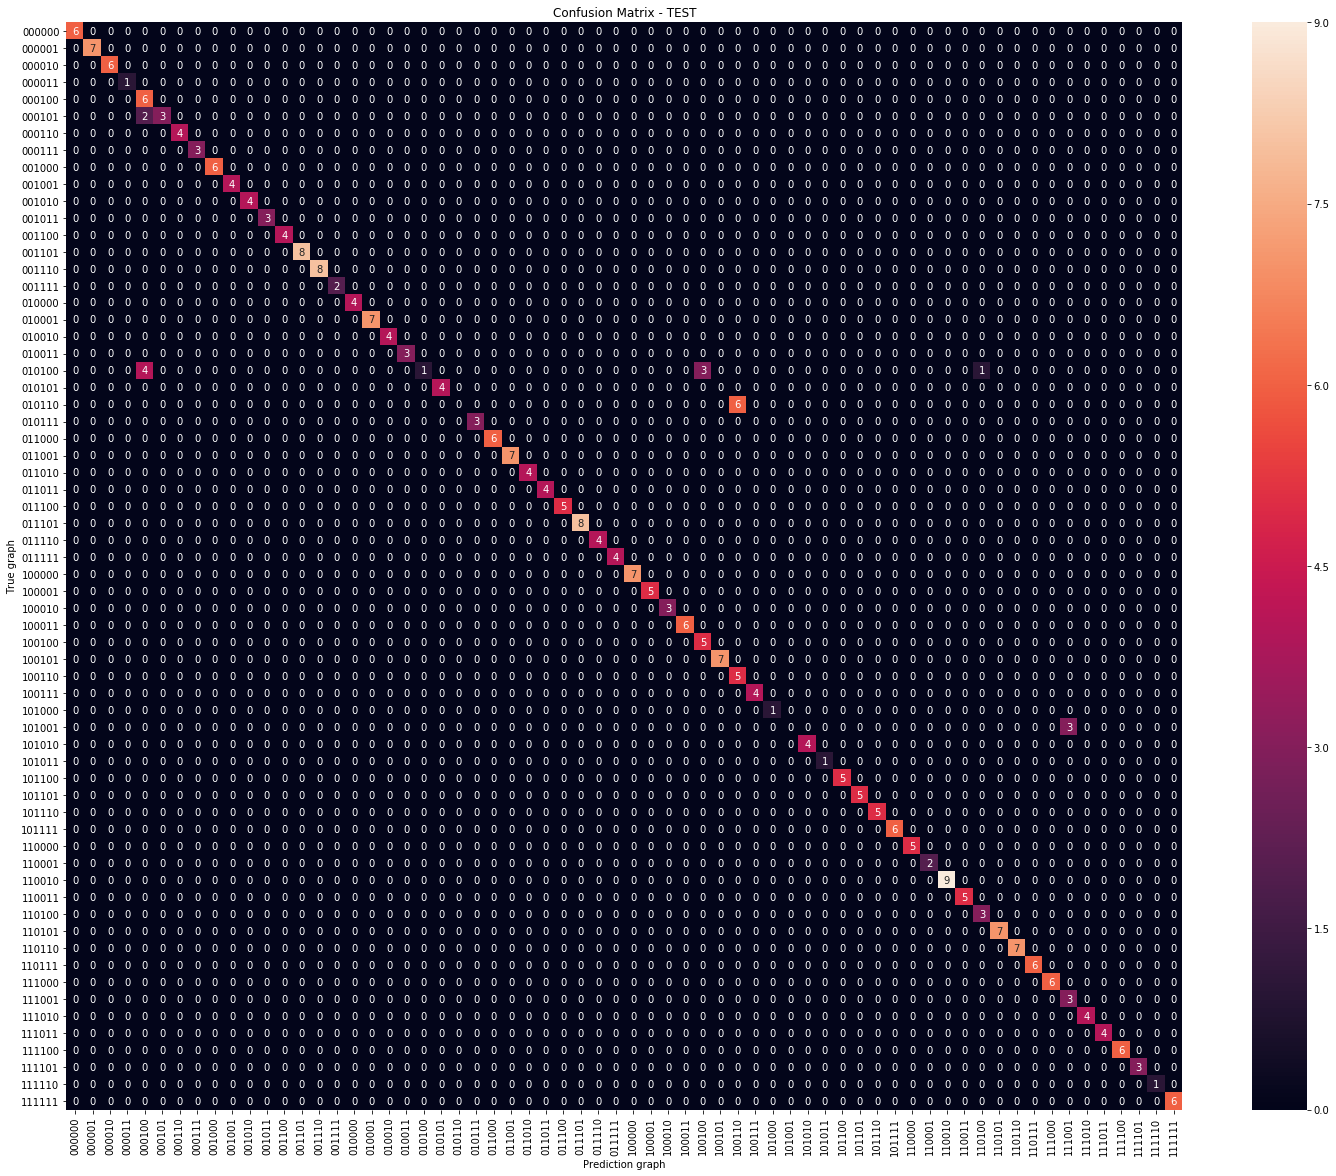

In [132]:

# Test
y_test_true_str,y_test_pred_str = get_y_true_pred_2_str(df_test_0,cls)
y_test_true_vect,y_test_pred_vect = get_y_true_pred_2_vec(df_test_0,cls)

cm_test = confusion_matrix(y_test_true,y_test_pred)

plot_cm(cm_test,"TEST",labels)

print_report_model(y_test_true,y_test_pred,"TEST")



nn_train_ha_2 = sum(np.diag(1-cdist(np.array(list(df_train_0['sub_graph'])), y_train_pred_vect, 'hamming')))/len(y_train_pred_vect)
nn_train_ac_2 = accuracy_score( np.array(list(df_train_0['sub_graph'])) ,  y_train_pred_vect ) 

nn_test_ha_2 = sum(np.diag(1-cdist(list(df_test_0['sub_graph']), y_test_pred_vect, 'hamming')))/len(y_test_pred_vect)
nn_test_ac_2 = accuracy_score( np.array(list(df_test_0['sub_graph'])) ,  y_test_pred_vect ) 



# dataset3



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       0.67      1.00      0.80        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


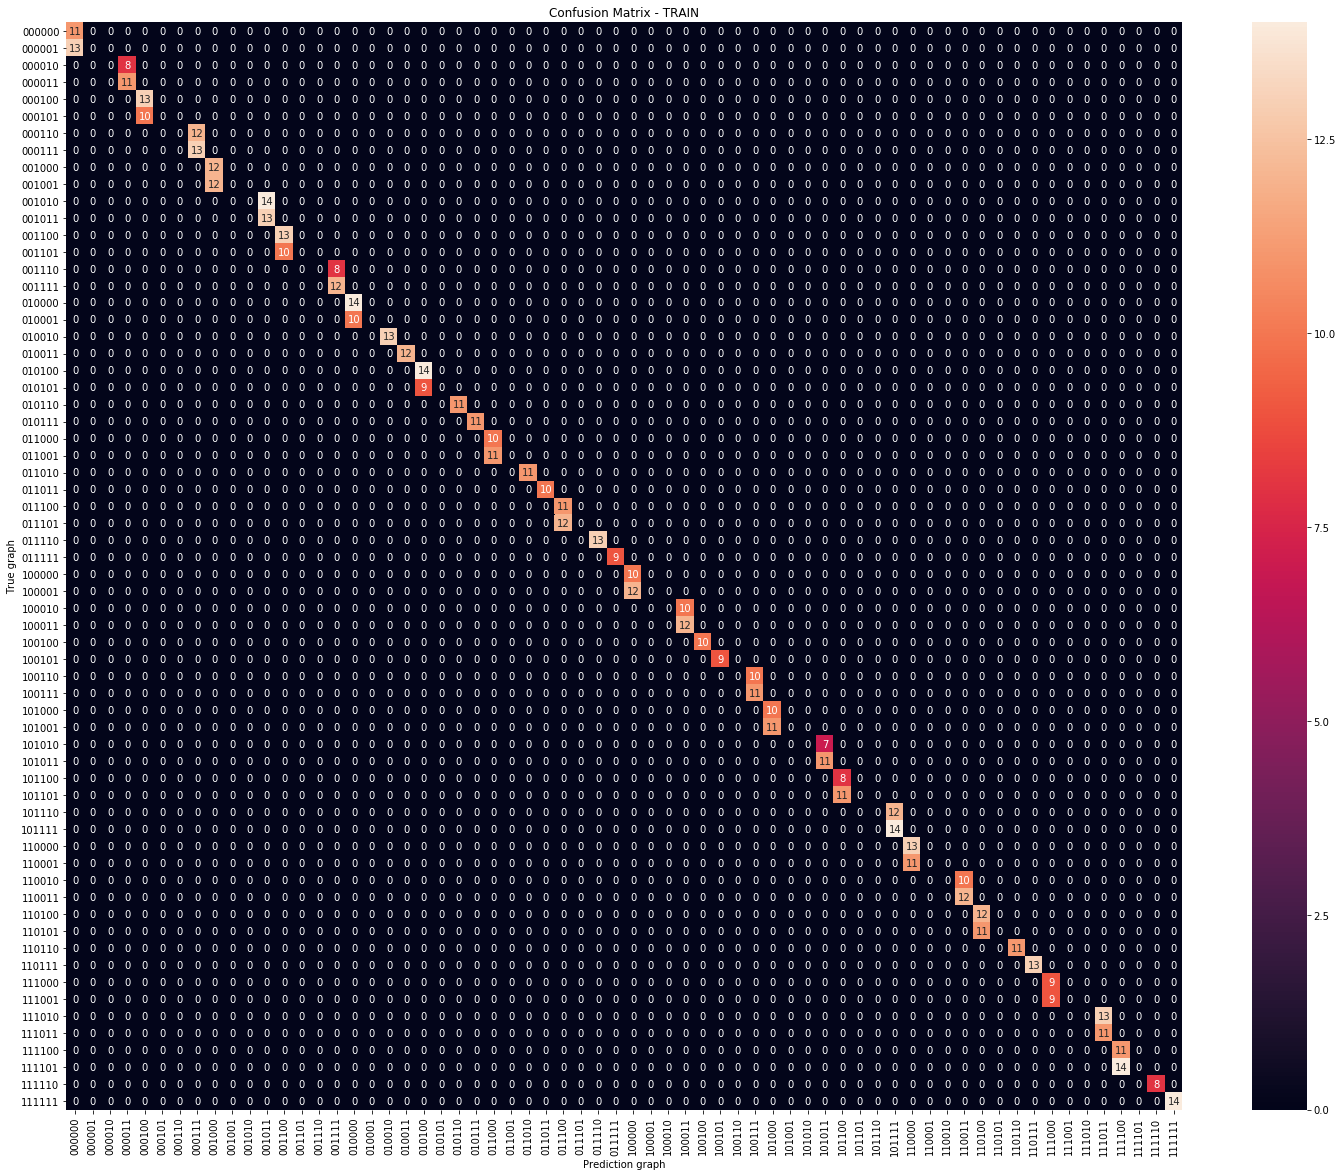

In [133]:
ruta_train = '../DATASET-10_6/dataset3/train3.csv'
ruta_test = '../DATASET-10_6/dataset3/test3.csv'



df_train_0, df_test_0 = elementString2Vector(ruta_train,ruta_test)

cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1,activation='logistic')

param = cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))

#print(param)

# Train
y_train_true_str,y_train_pred_str = get_y_true_pred_2_str(df_train_0,cls)
y_train_true_vect,y_train_pred_vect = get_y_true_pred_2_vec(df_train_0,cls)

cm_train = confusion_matrix(y_train_true_str,y_train_pred_str)

plot_cm(cm_train,"TRAIN",labels)

print_report_model(y_train_true,y_train_pred,"TRAIN")




******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       0.50      1.00      0.67         6
      000101       1.00      0.60      0.75         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


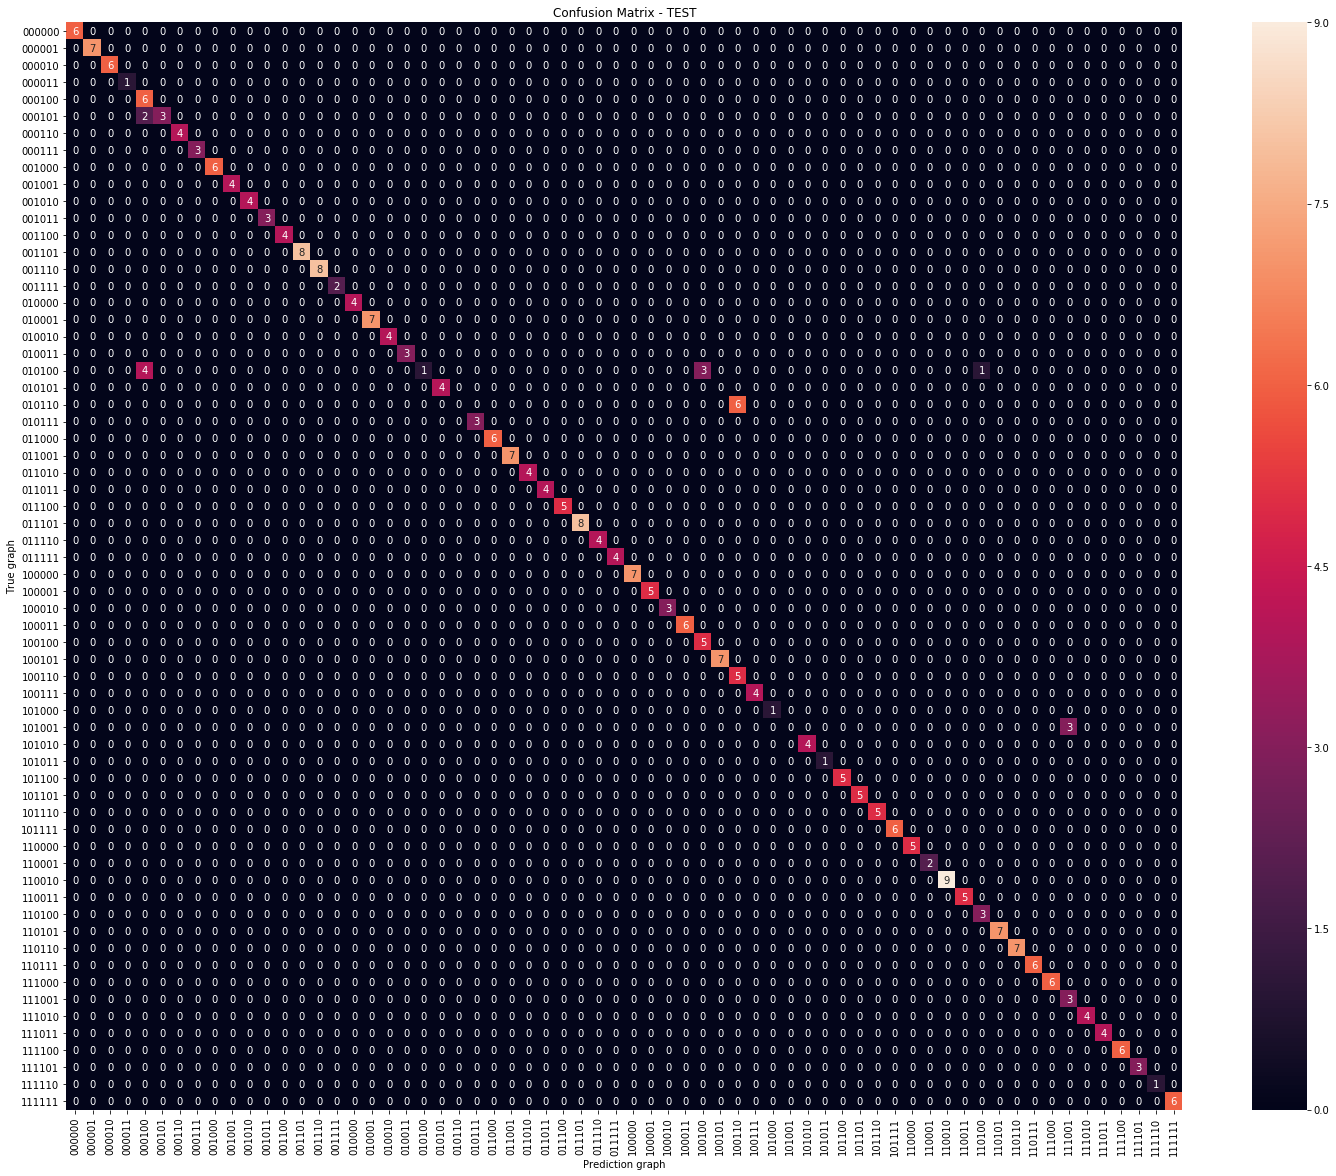

In [134]:

# Test
y_test_true_str,y_test_pred_str = get_y_true_pred_2_str(df_test_0,cls)
y_test_true_vect,y_test_pred_vect = get_y_true_pred_2_vec(df_test_0,cls)

cm_test = confusion_matrix(y_test_true,y_test_pred)

plot_cm(cm_test,"TEST",labels)

print_report_model(y_test_true,y_test_pred,"TEST")



nn_train_ha_3 = sum(np.diag(1-cdist(np.array(list(df_train_0['sub_graph'])), y_train_pred_vect, 'hamming')))/len(y_train_pred_vect)
nn_train_ac_3 = accuracy_score( np.array(list(df_train_0['sub_graph'])) ,  y_train_pred_vect ) 

nn_test_ha_3 = sum(np.diag(1-cdist(list(df_test_0['sub_graph']), y_test_pred_vect, 'hamming')))/len(y_test_pred_vect)
nn_test_ac_3 = accuracy_score( np.array(list(df_test_0['sub_graph'])) ,  y_test_pred_vect ) 



# dataset 4



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       0.67      1.00      0.80        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


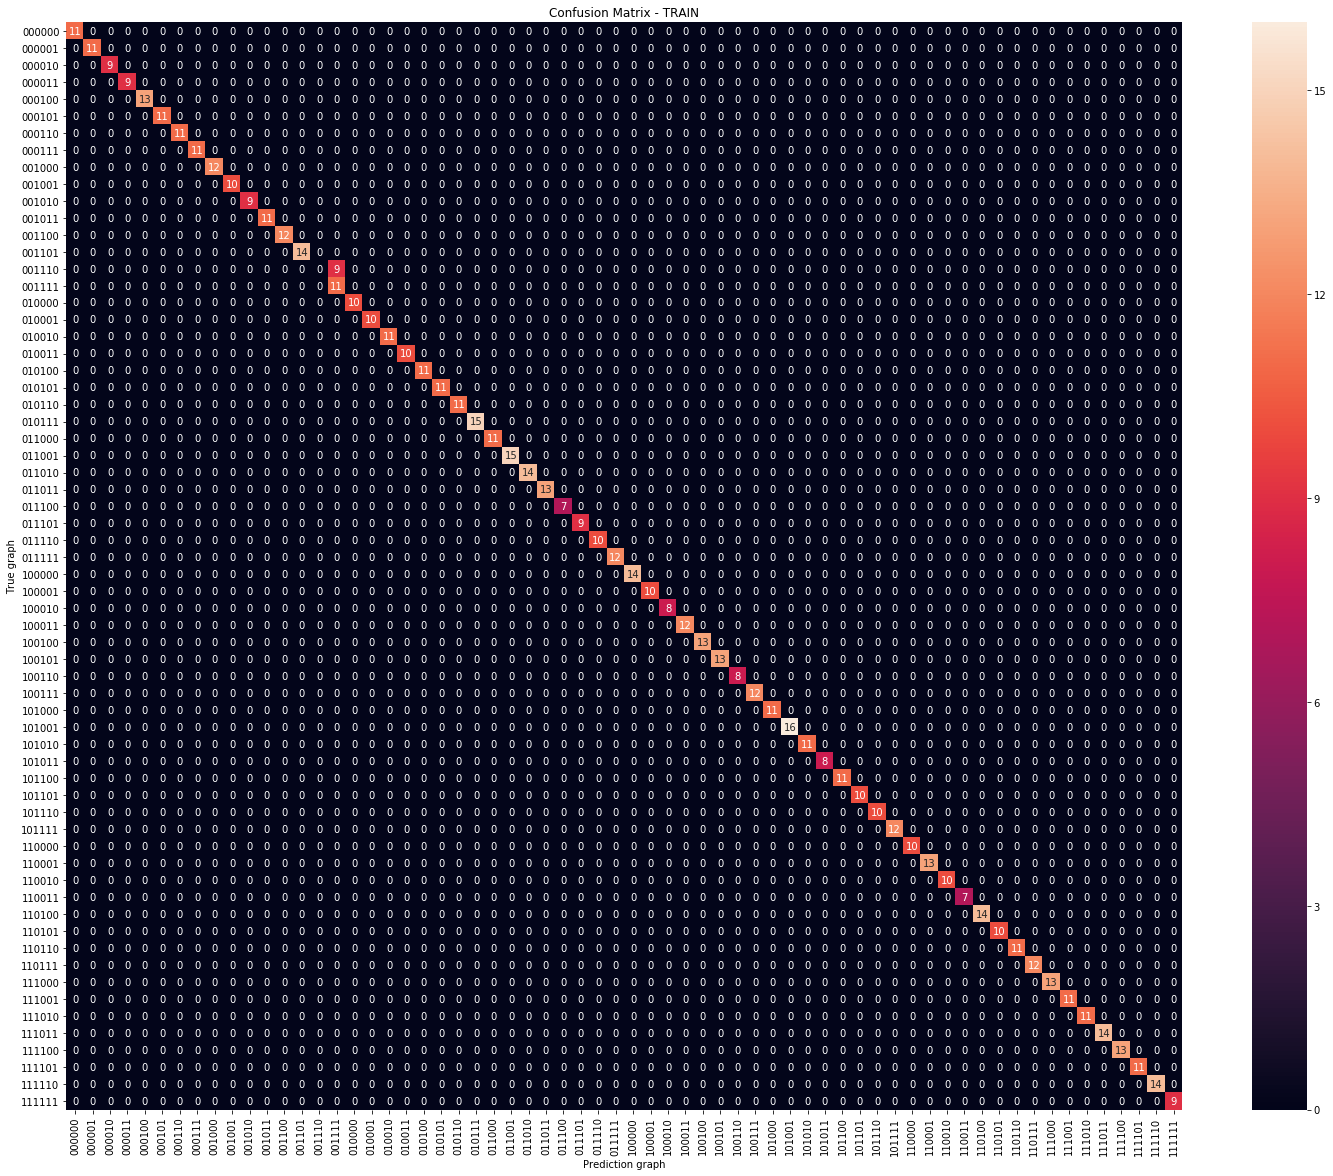

In [135]:
ruta_train = '../DATASET-10_6/dataset4/train4.csv'
ruta_test = '../DATASET-10_6/dataset4/test4.csv'



df_train_0, df_test_0 = elementString2Vector(ruta_train,ruta_test)

cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1,activation='logistic')

param = cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))

#print(param)

# Train
y_train_true_str,y_train_pred_str = get_y_true_pred_2_str(df_train_0,cls)
y_train_true_vect,y_train_pred_vect = get_y_true_pred_2_vec(df_train_0,cls)

cm_train = confusion_matrix(y_train_true_str,y_train_pred_str)

plot_cm(cm_train,"TRAIN",labels)

print_report_model(y_train_true,y_train_pred,"TRAIN")




******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       0.50      1.00      0.67         6
      000101       1.00      0.60      0.75         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


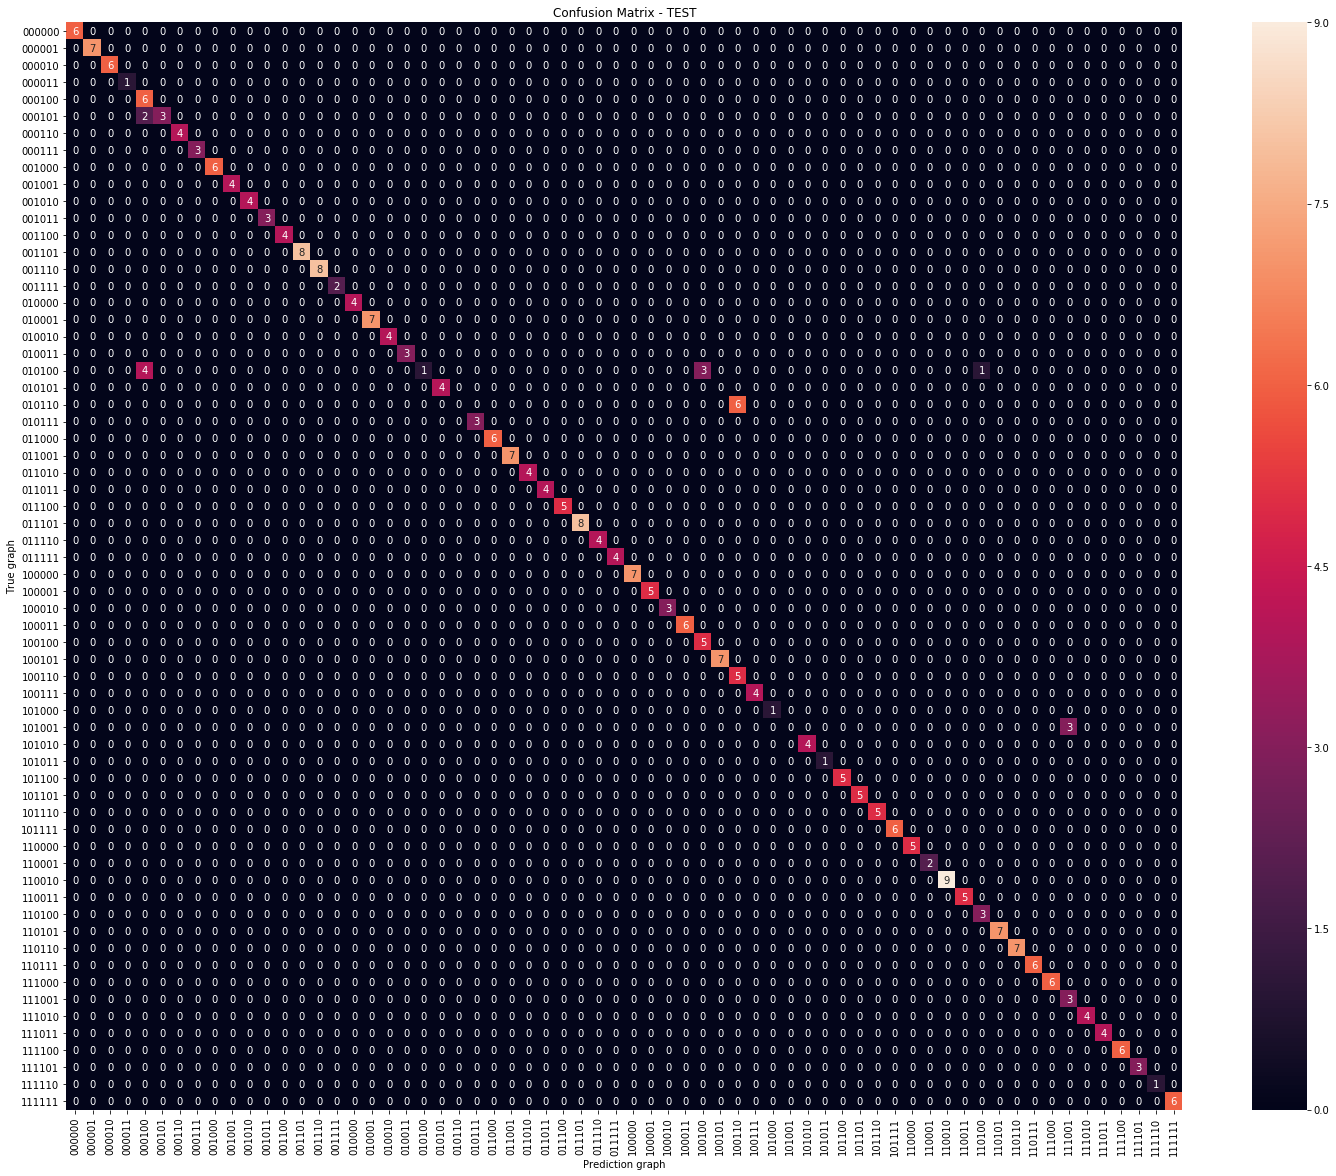

In [136]:

# Test
y_test_true_str,y_test_pred_str = get_y_true_pred_2_str(df_test_0,cls)
y_test_true_vect,y_test_pred_vect = get_y_true_pred_2_vec(df_test_0,cls)

cm_test = confusion_matrix(y_test_true,y_test_pred)

plot_cm(cm_test,"TEST",labels)

print_report_model(y_test_true,y_test_pred,"TEST")



nn_train_ha_4 = sum(np.diag(1-cdist(np.array(list(df_train_0['sub_graph'])), y_train_pred_vect, 'hamming')))/len(y_train_pred_vect)
nn_train_ac_4 = accuracy_score( np.array(list(df_train_0['sub_graph'])) ,  y_train_pred_vect ) 

nn_test_ha_4 = sum(np.diag(1-cdist(list(df_test_0['sub_graph']), y_test_pred_vect, 'hamming')))/len(y_test_pred_vect)
nn_test_ac_4 = accuracy_score( np.array(list(df_test_0['sub_graph'])) ,  y_test_pred_vect ) 



# dataset 5



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       0.67      1.00      0.80        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


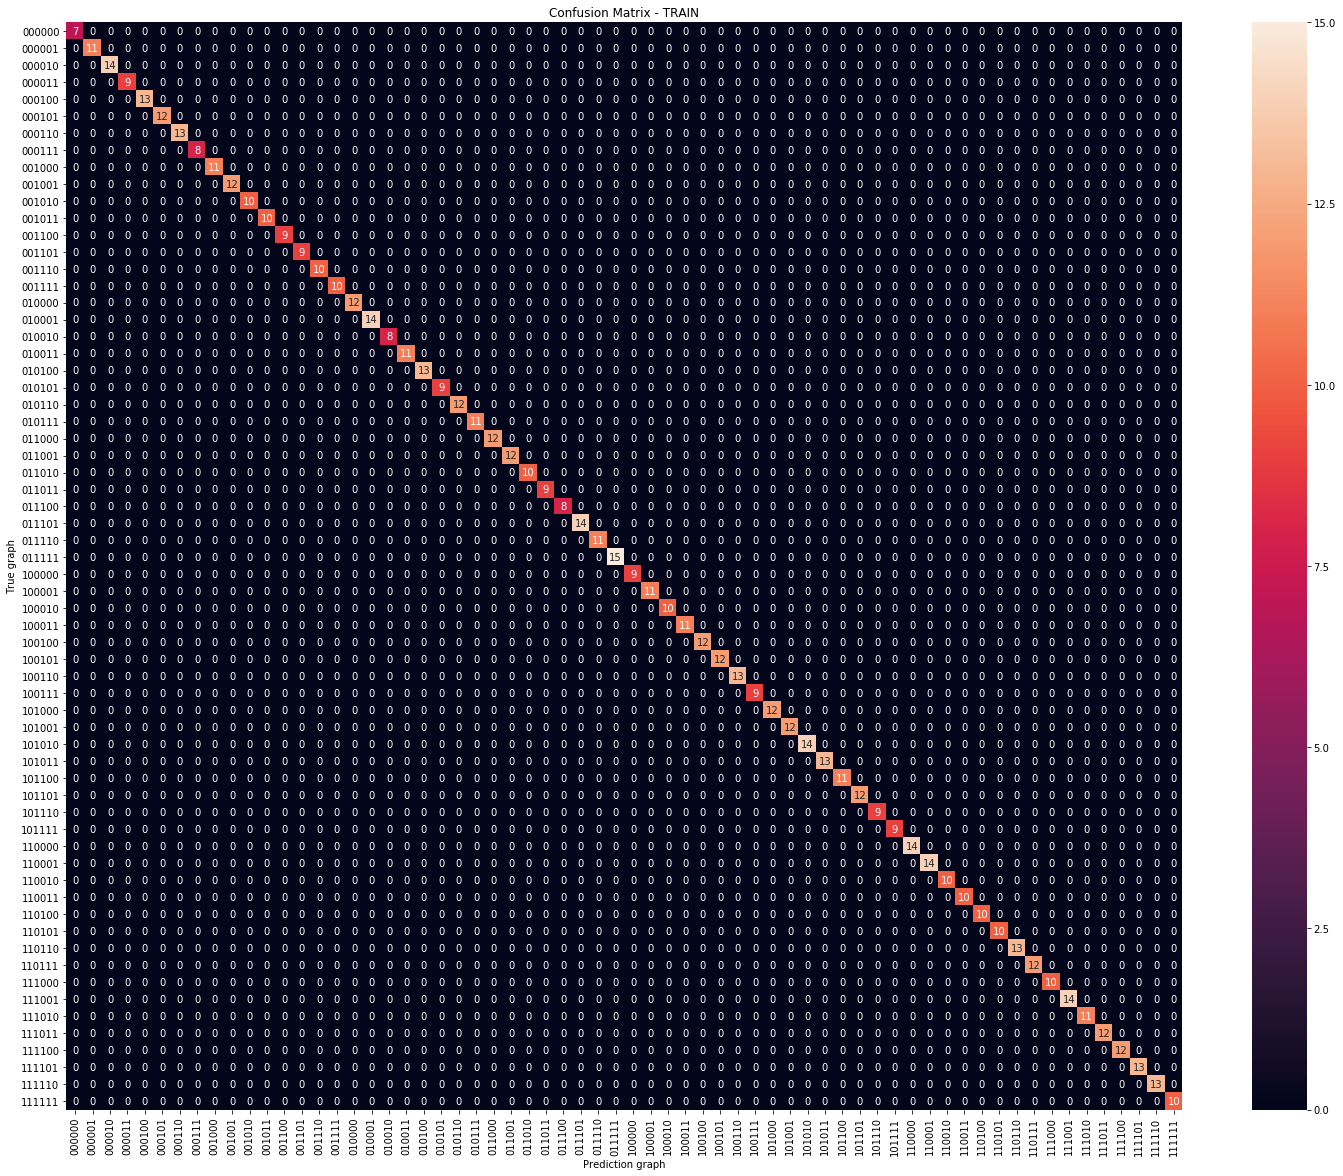

In [137]:
ruta_train = '../DATASET-10_6/dataset5/train5.csv'
ruta_test = '../DATASET-10_6/dataset5/test5.csv'



df_train_0, df_test_0 = elementString2Vector(ruta_train,ruta_test)

cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1,activation='logistic')

param = cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))

#print(param)

# Train
y_train_true_str,y_train_pred_str = get_y_true_pred_2_str(df_train_0,cls)
y_train_true_vect,y_train_pred_vect = get_y_true_pred_2_vec(df_train_0,cls)

cm_train = confusion_matrix(y_train_true_str,y_train_pred_str)

plot_cm(cm_train,"TRAIN",labels)

print_report_model(y_train_true,y_train_pred,"TRAIN")




******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       0.50      1.00      0.67         6
      000101       1.00      0.60      0.75         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


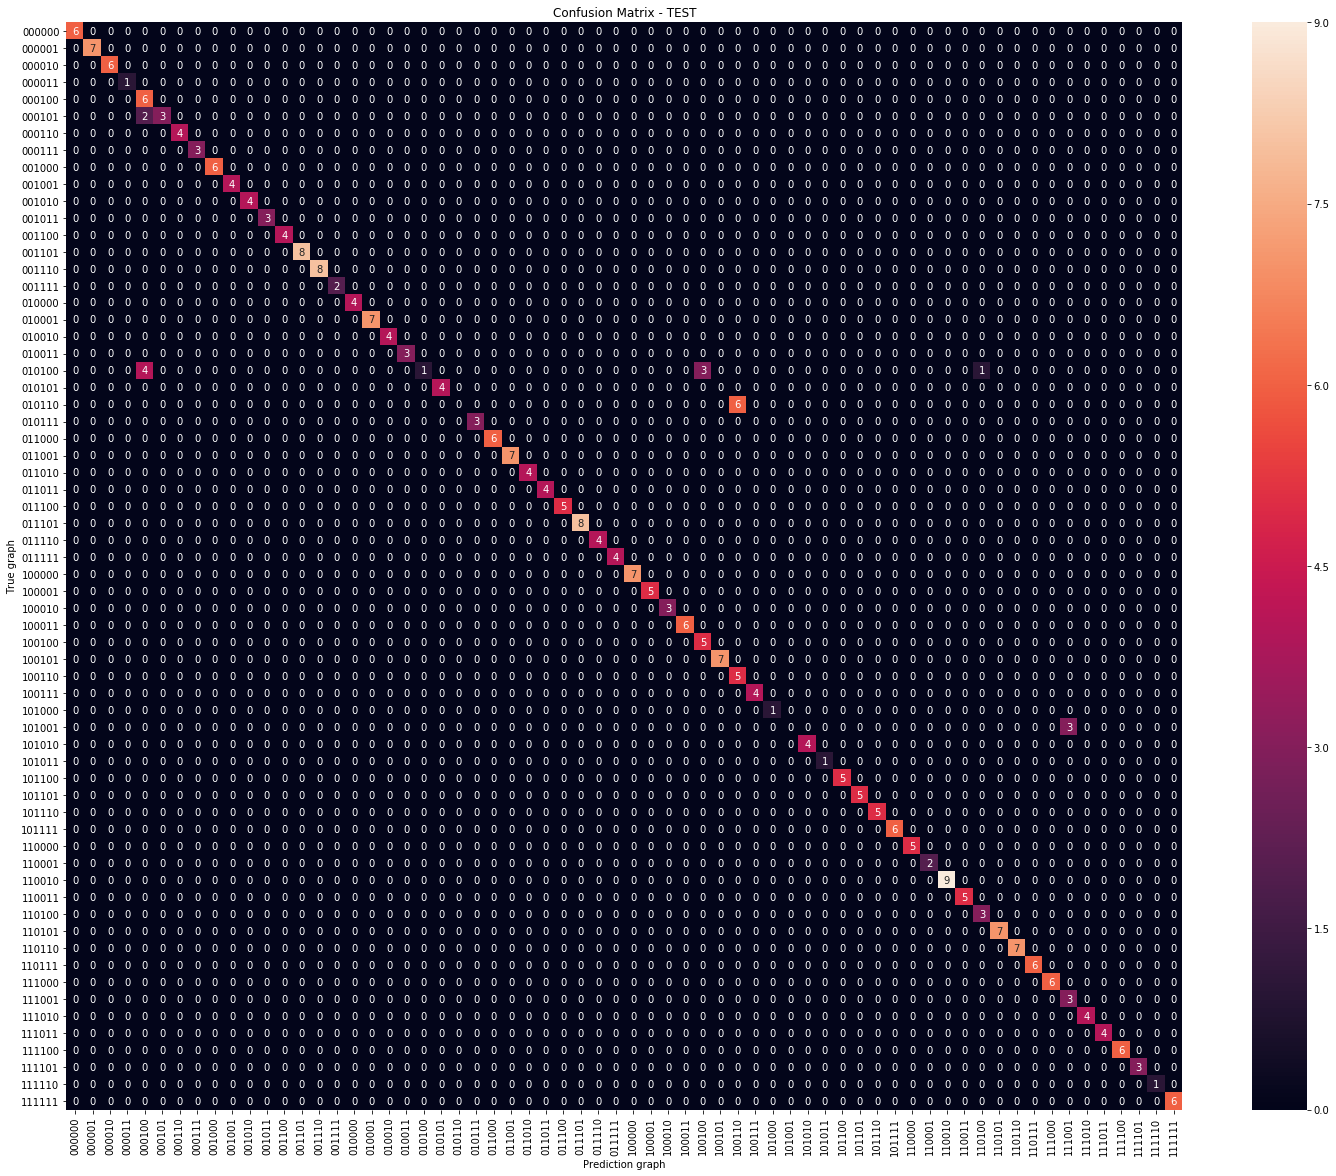

In [138]:

# Test
y_test_true_str,y_test_pred_str = get_y_true_pred_2_str(df_test_0,cls)
y_test_true_vect,y_test_pred_vect = get_y_true_pred_2_vec(df_test_0,cls)

cm_test = confusion_matrix(y_test_true,y_test_pred)

plot_cm(cm_test,"TEST",labels)

print_report_model(y_test_true,y_test_pred,"TEST")



nn_train_ha_5 = sum(np.diag(1-cdist(np.array(list(df_train_0['sub_graph'])), y_train_pred_vect, 'hamming')))/len(y_train_pred_vect)
nn_train_ac_5 = accuracy_score( np.array(list(df_train_0['sub_graph'])) ,  y_train_pred_vect ) 

nn_test_ha_5 = sum(np.diag(1-cdist(list(df_test_0['sub_graph']), y_test_pred_vect, 'hamming')))/len(y_test_pred_vect)
nn_test_ac_5 = accuracy_score( np.array(list(df_test_0['sub_graph'])) ,  y_test_pred_vect ) 



# dataset 6



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       0.67      1.00      0.80        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


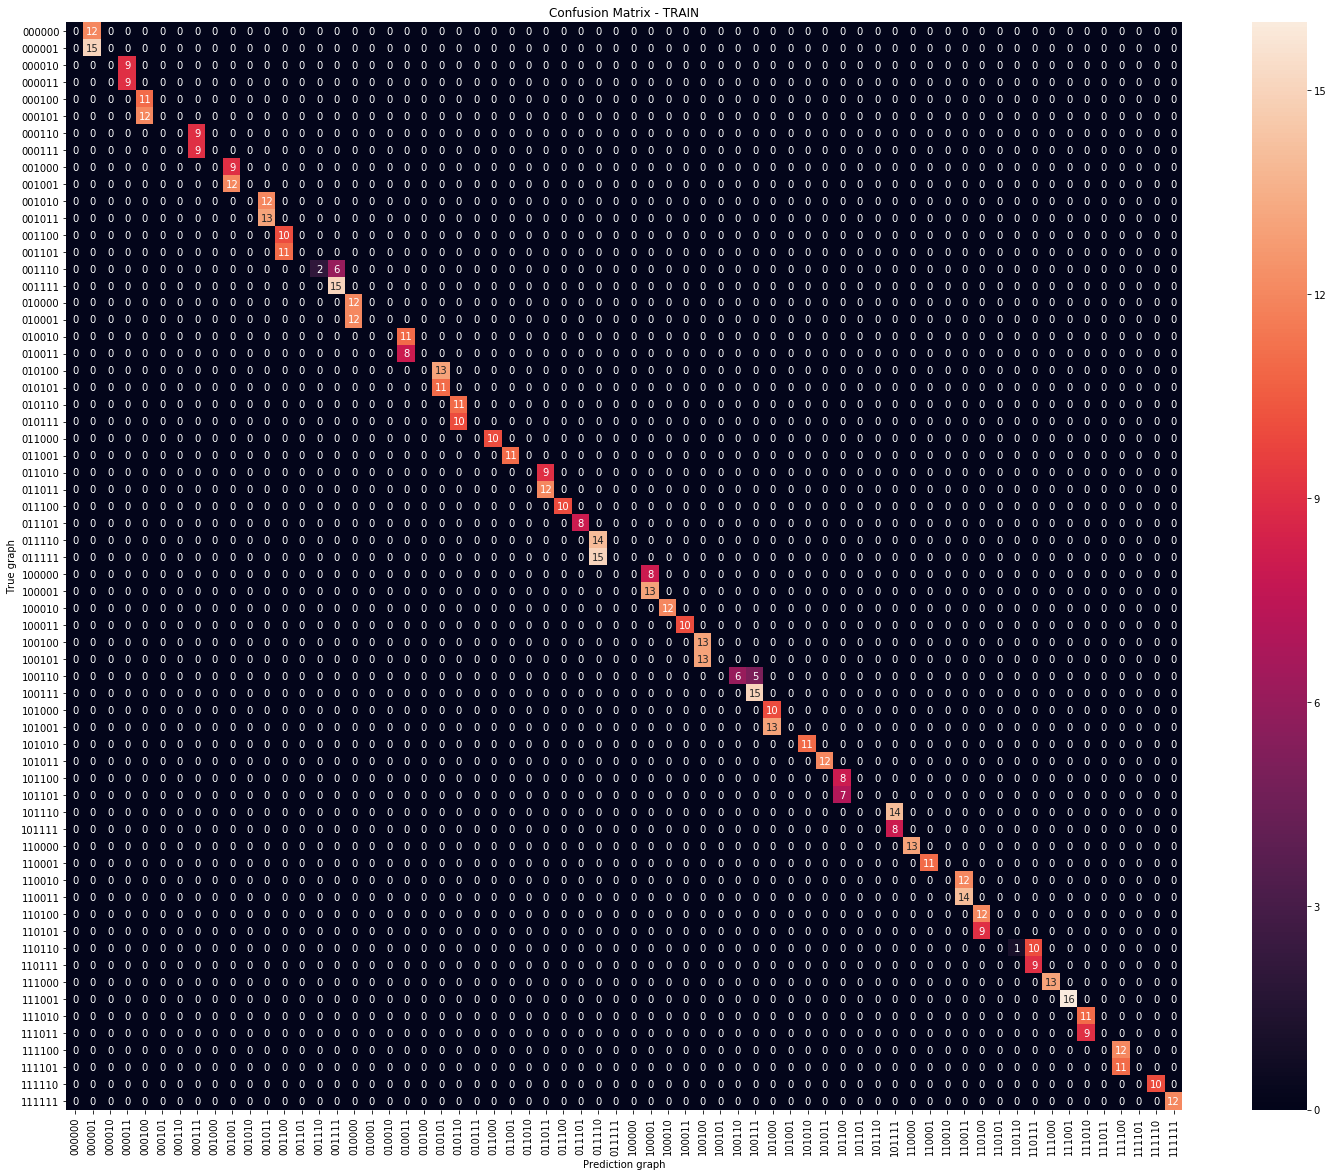

In [139]:
ruta_train = '../DATASET-10_6/dataset6/train6.csv'
ruta_test = '../DATASET-10_6/dataset6/test6.csv'



df_train_0, df_test_0 = elementString2Vector(ruta_train,ruta_test)

cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1,activation='logistic')

param = cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))

#print(param)

# Train
y_train_true_str,y_train_pred_str = get_y_true_pred_2_str(df_train_0,cls)
y_train_true_vect,y_train_pred_vect = get_y_true_pred_2_vec(df_train_0,cls)

cm_train = confusion_matrix(y_train_true_str,y_train_pred_str)

plot_cm(cm_train,"TRAIN",labels)

print_report_model(y_train_true,y_train_pred,"TRAIN")




******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       0.50      1.00      0.67         6
      000101       1.00      0.60      0.75         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


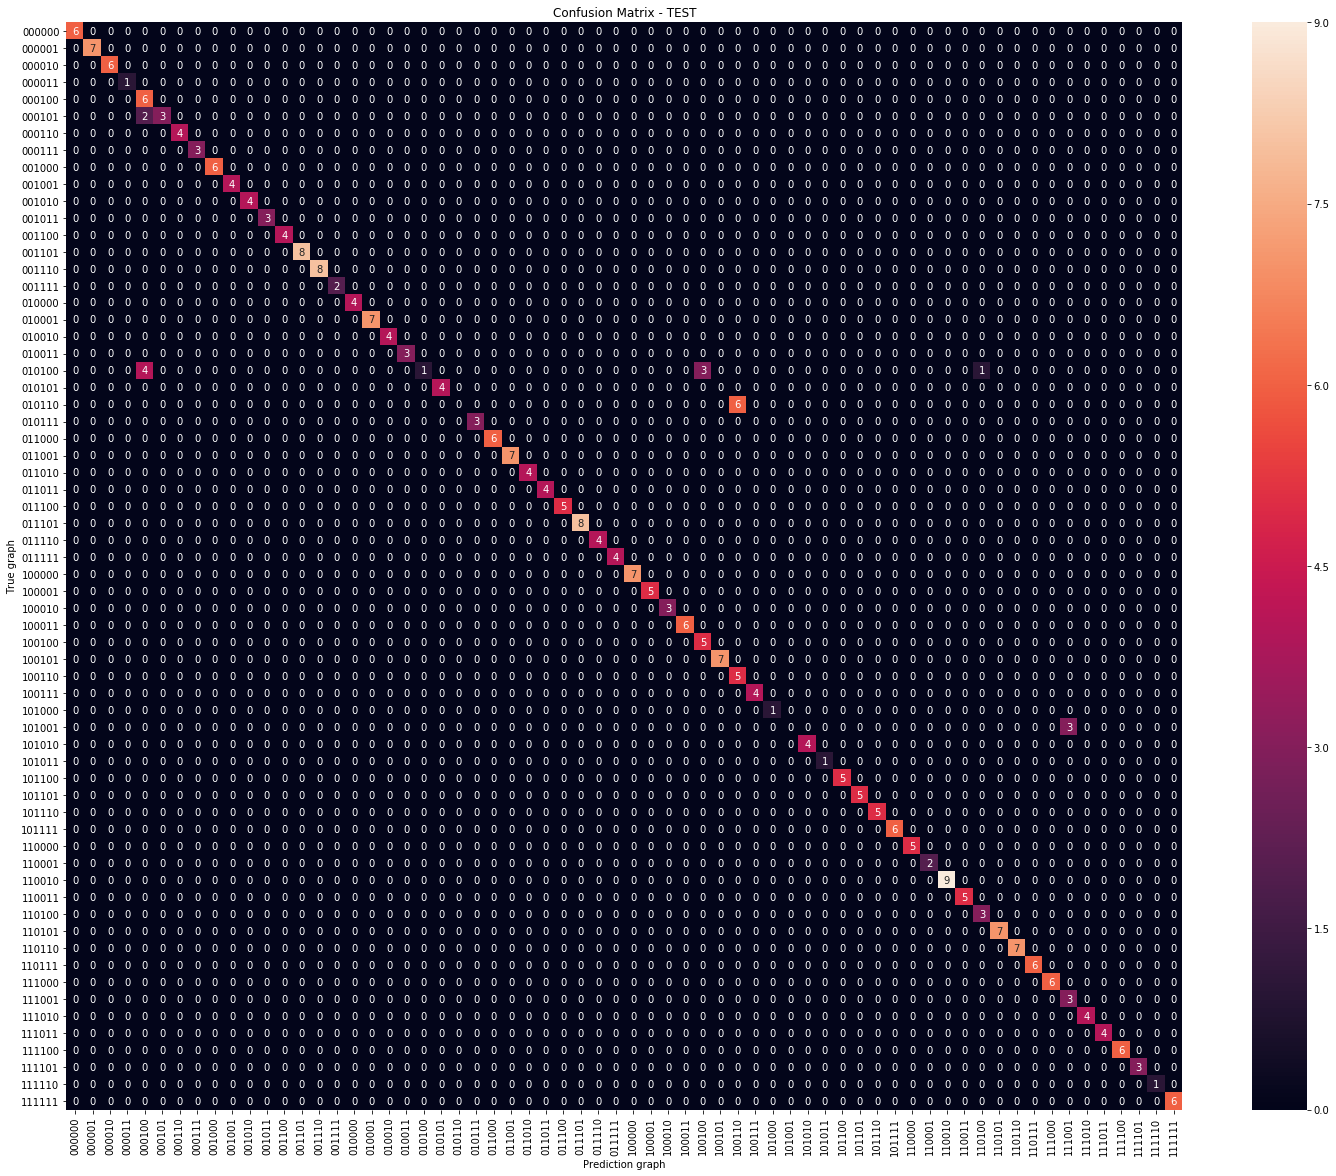

In [140]:

# Test
y_test_true_str,y_test_pred_str = get_y_true_pred_2_str(df_test_0,cls)
y_test_true_vect,y_test_pred_vect = get_y_true_pred_2_vec(df_test_0,cls)

cm_test = confusion_matrix(y_test_true,y_test_pred)

plot_cm(cm_test,"TEST",labels)

print_report_model(y_test_true,y_test_pred,"TEST")



nn_train_ha_6 = sum(np.diag(1-cdist(np.array(list(df_train_0['sub_graph'])), y_train_pred_vect, 'hamming')))/len(y_train_pred_vect)
nn_train_ac_6 = accuracy_score( np.array(list(df_train_0['sub_graph'])) ,  y_train_pred_vect ) 

nn_test_ha_6 = sum(np.diag(1-cdist(list(df_test_0['sub_graph']), y_test_pred_vect, 'hamming')))/len(y_test_pred_vect)
nn_test_ac_6 = accuracy_score( np.array(list(df_test_0['sub_graph'])) ,  y_test_pred_vect ) 



# dataset7



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       0.67      1.00      0.80        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


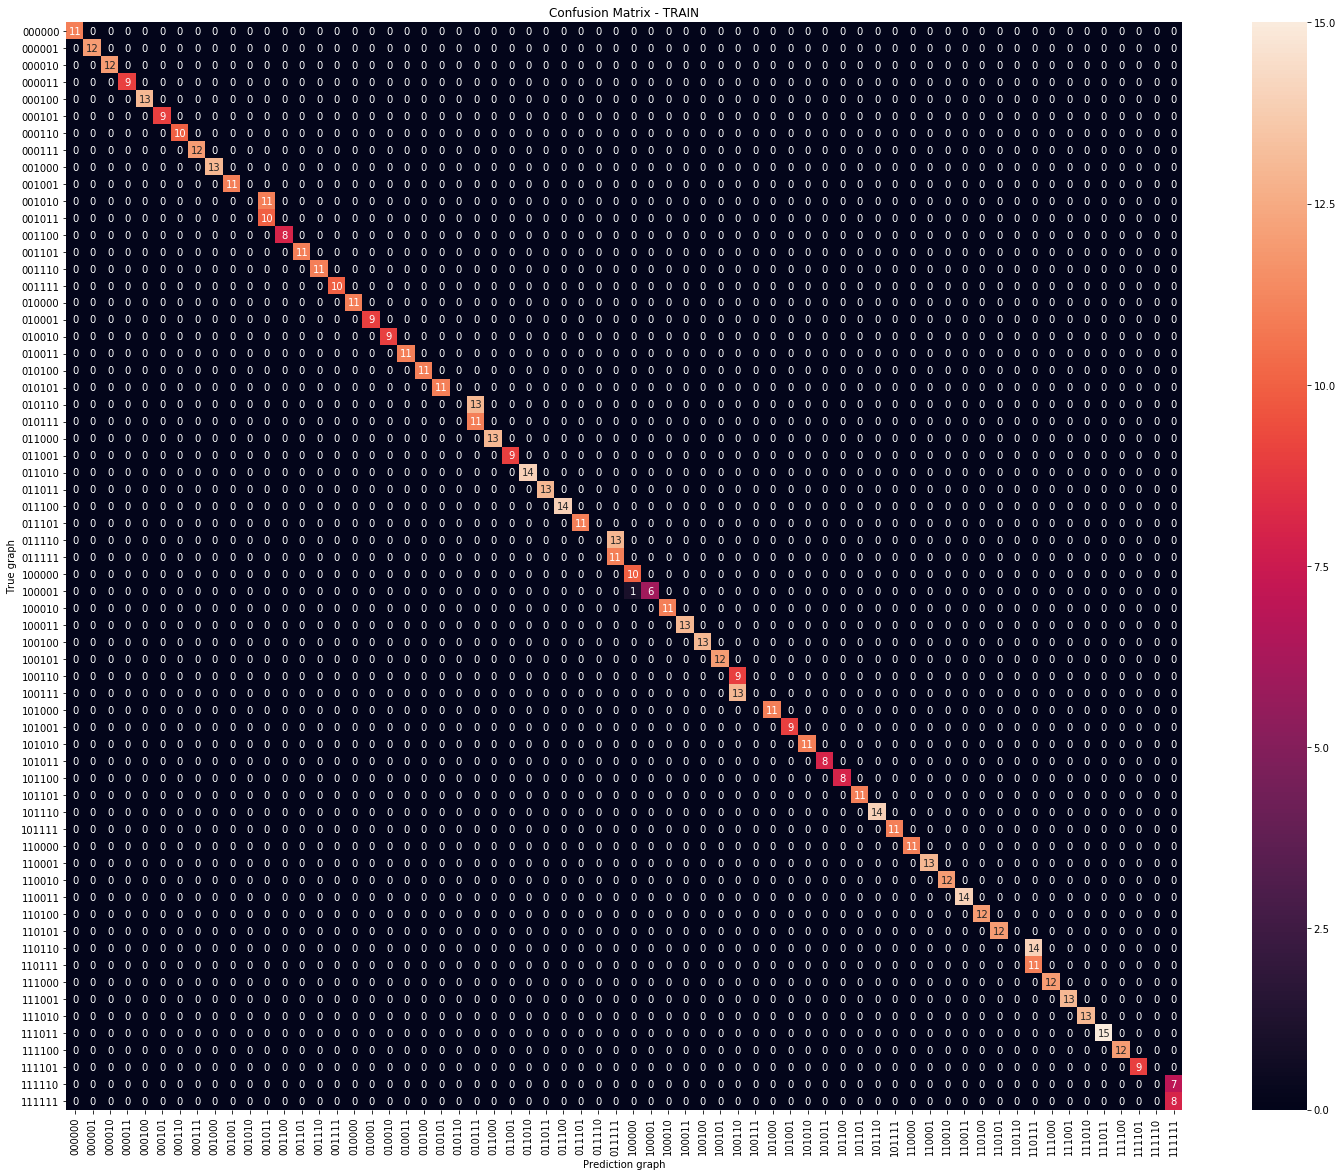

In [141]:
ruta_train = '../DATASET-10_6/dataset7/train7.csv'
ruta_test = '../DATASET-10_6/dataset7/test7.csv'



df_train_0, df_test_0 = elementString2Vector(ruta_train,ruta_test)

cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1,activation='logistic')

param = cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))

#print(param)

# Train
y_train_true_str,y_train_pred_str = get_y_true_pred_2_str(df_train_0,cls)
y_train_true_vect,y_train_pred_vect = get_y_true_pred_2_vec(df_train_0,cls)

cm_train = confusion_matrix(y_train_true_str,y_train_pred_str)

plot_cm(cm_train,"TRAIN",labels)

print_report_model(y_train_true,y_train_pred,"TRAIN")




******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       0.50      1.00      0.67         6
      000101       1.00      0.60      0.75         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


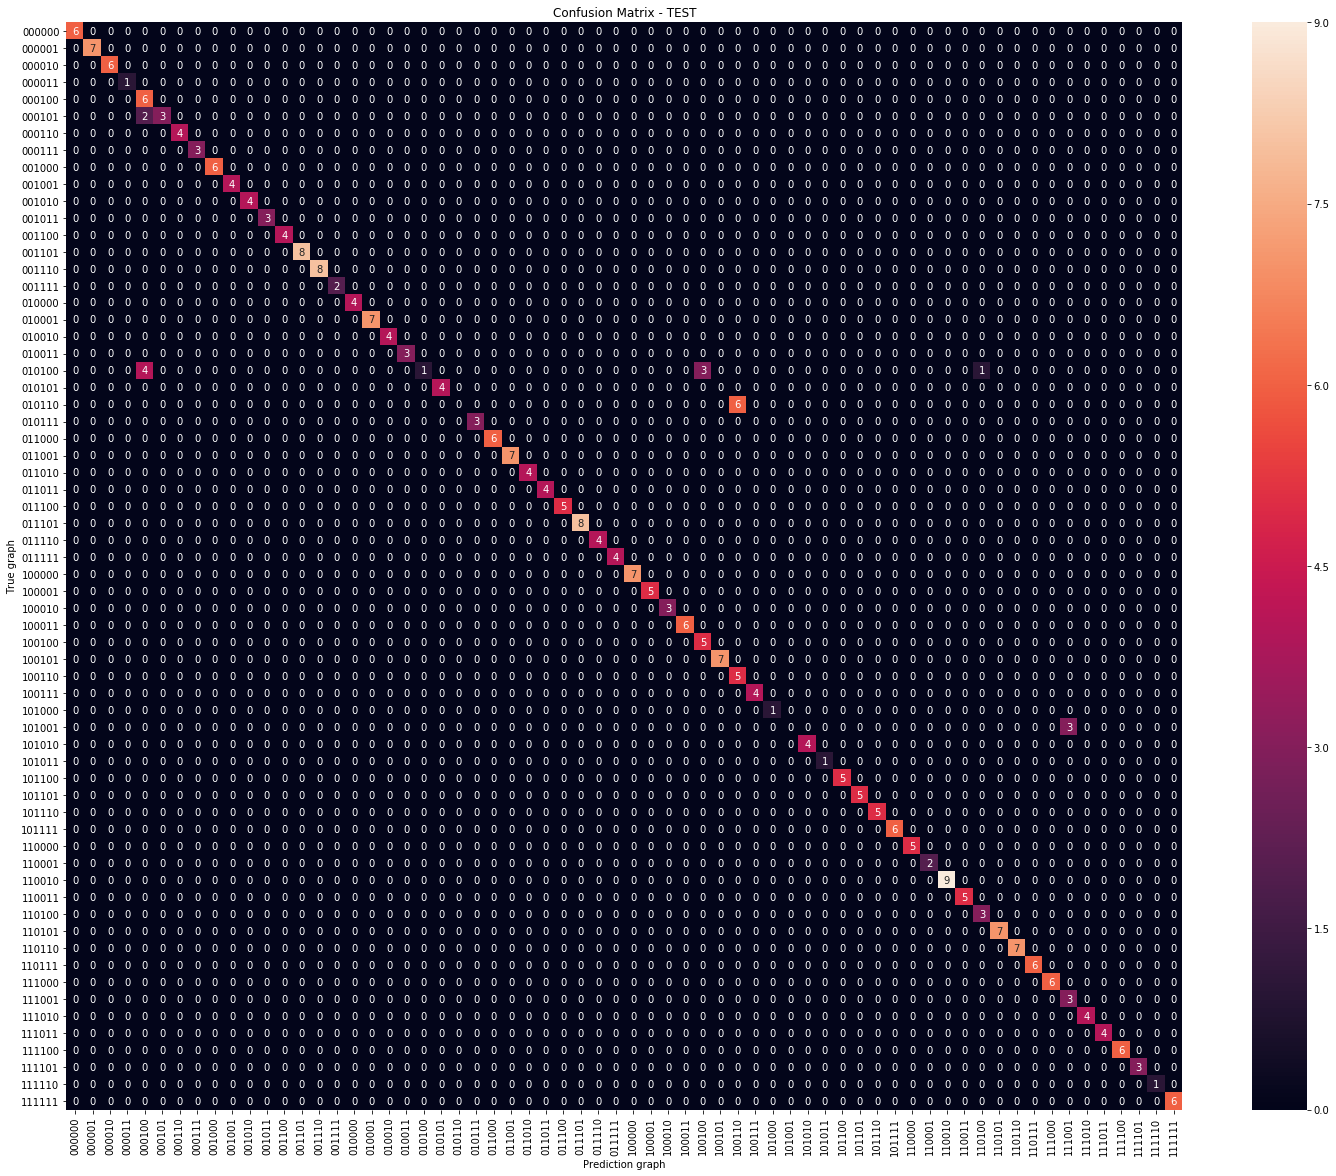

In [142]:

# Test
y_test_true_str,y_test_pred_str = get_y_true_pred_2_str(df_test_0,cls)
y_test_true_vect,y_test_pred_vect = get_y_true_pred_2_vec(df_test_0,cls)

cm_test = confusion_matrix(y_test_true,y_test_pred)

plot_cm(cm_test,"TEST",labels)

print_report_model(y_test_true,y_test_pred,"TEST")



nn_train_ha_7 = sum(np.diag(1-cdist(np.array(list(df_train_0['sub_graph'])), y_train_pred_vect, 'hamming')))/len(y_train_pred_vect)
nn_train_ac_7 = accuracy_score( np.array(list(df_train_0['sub_graph'])) ,  y_train_pred_vect ) 

nn_test_ha_7 = sum(np.diag(1-cdist(list(df_test_0['sub_graph']), y_test_pred_vect, 'hamming')))/len(y_test_pred_vect)
nn_test_ac_7 = accuracy_score( np.array(list(df_test_0['sub_graph'])) ,  y_test_pred_vect ) 



# dataset8



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       0.67      1.00      0.80        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


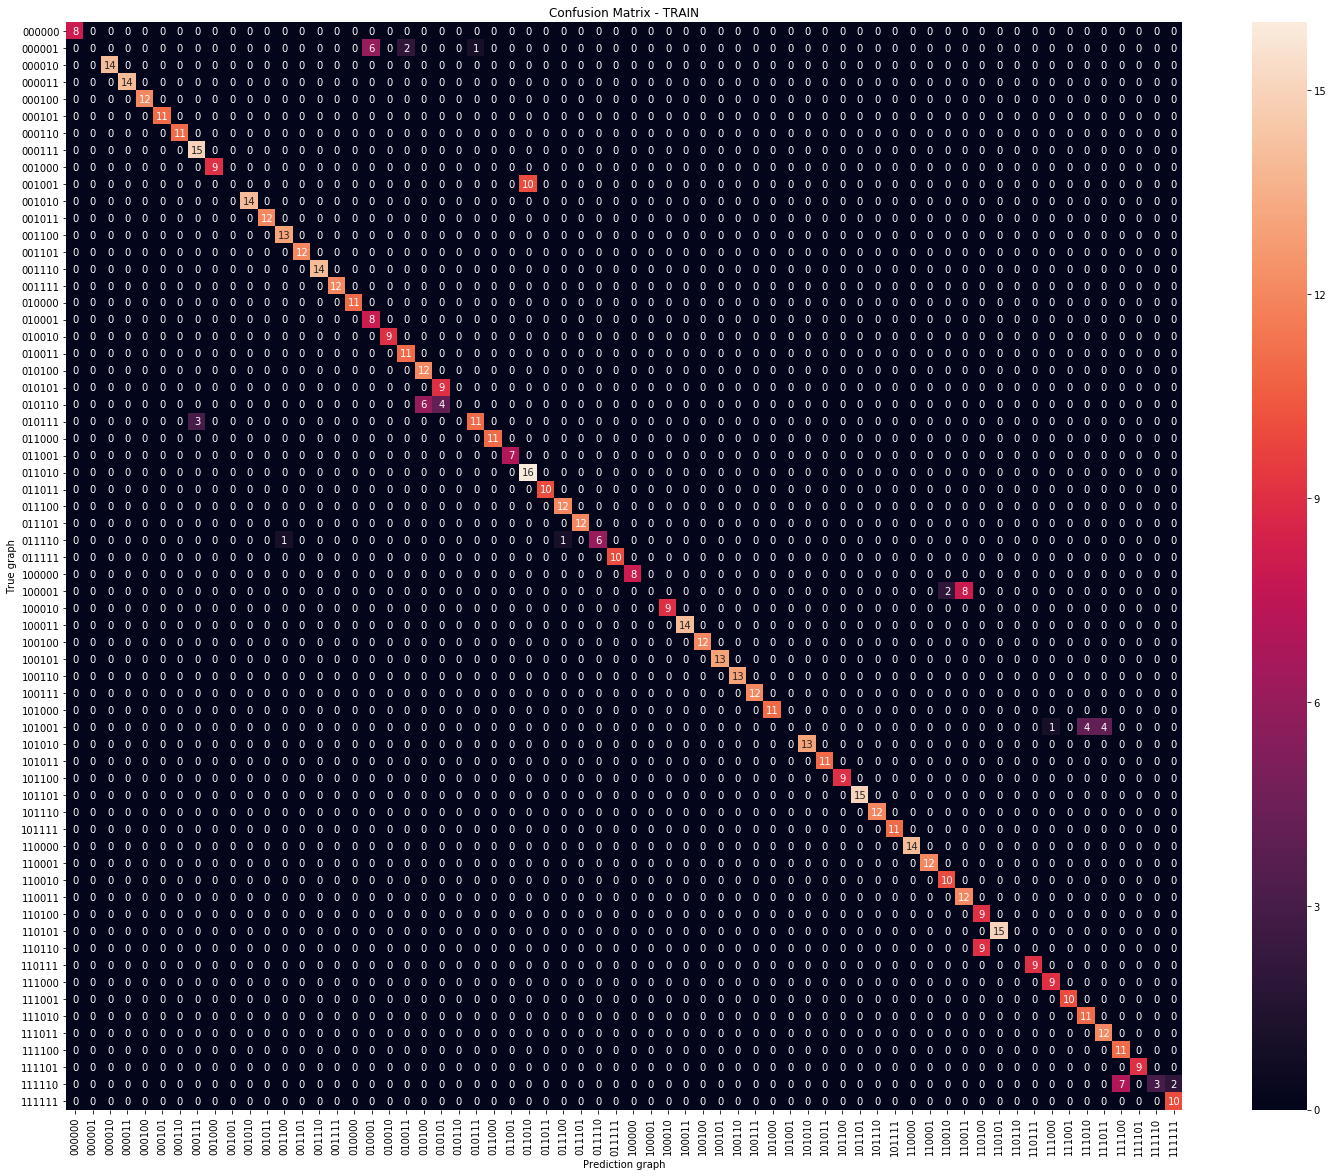

In [143]:
ruta_train = '../DATASET-10_6/dataset8/train8.csv'
ruta_test = '../DATASET-10_6/dataset8/test8.csv'



df_train_0, df_test_0 = elementString2Vector(ruta_train,ruta_test)

cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1,activation='logistic')

param = cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))

#print(param)

# Train
y_train_true_str,y_train_pred_str = get_y_true_pred_2_str(df_train_0,cls)
y_train_true_vect,y_train_pred_vect = get_y_true_pred_2_vec(df_train_0,cls)

cm_train = confusion_matrix(y_train_true_str,y_train_pred_str)

plot_cm(cm_train,"TRAIN",labels)

print_report_model(y_train_true,y_train_pred,"TRAIN")




******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       0.50      1.00      0.67         6
      000101       1.00      0.60      0.75         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


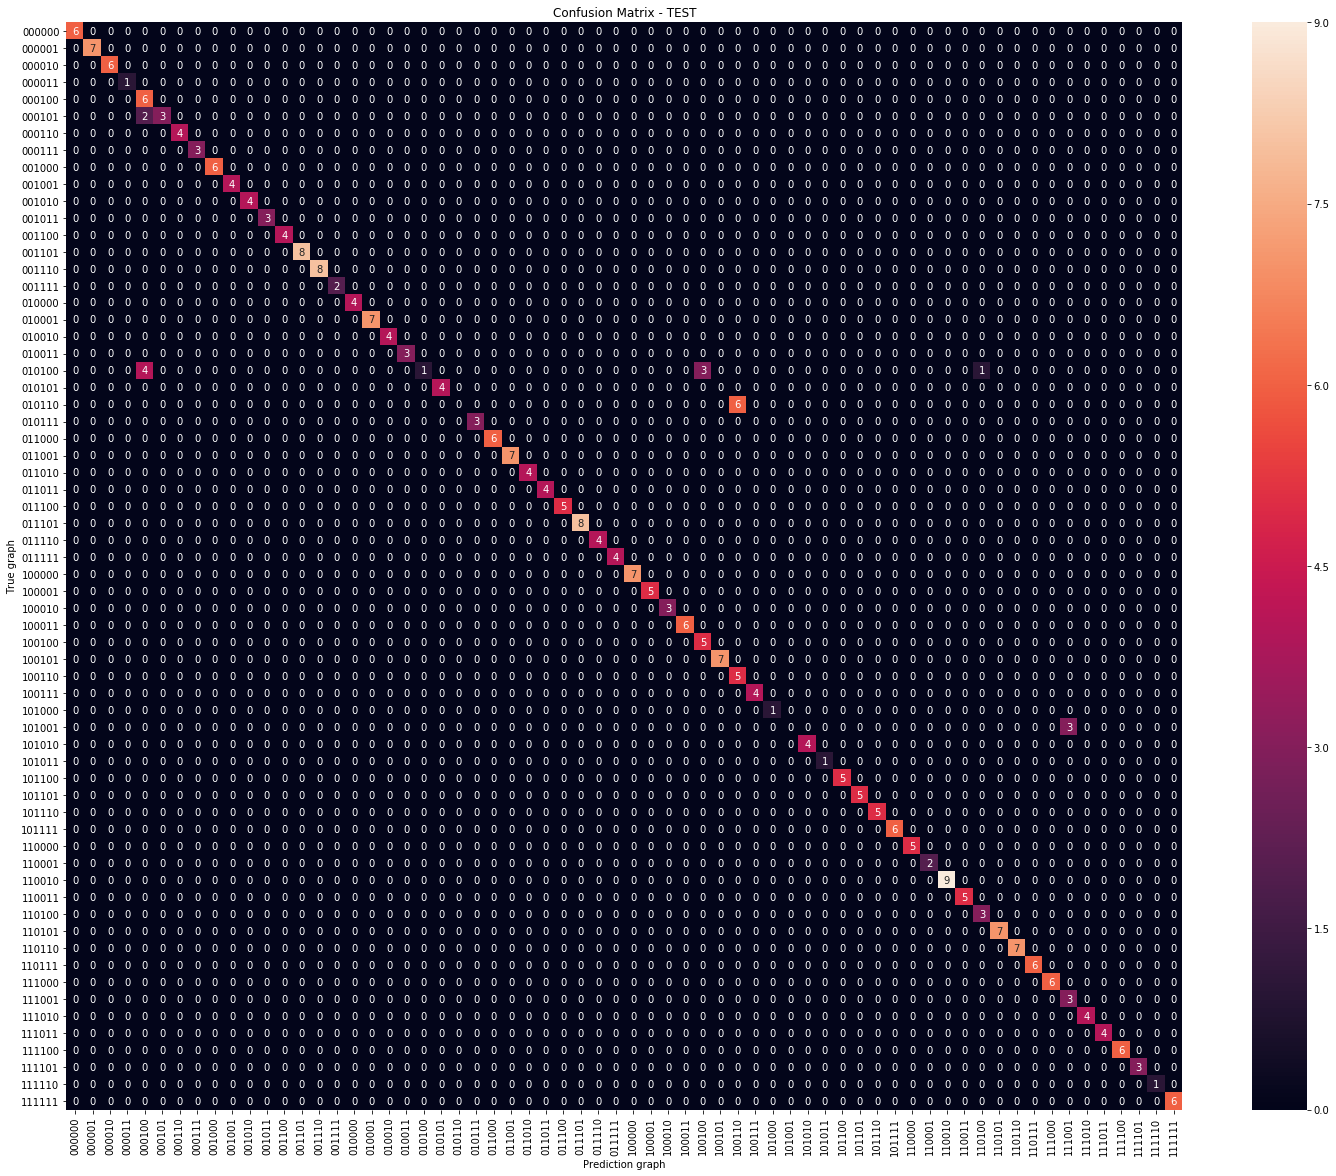

In [144]:

# Test
y_test_true_str,y_test_pred_str = get_y_true_pred_2_str(df_test_0,cls)
y_test_true_vect,y_test_pred_vect = get_y_true_pred_2_vec(df_test_0,cls)

cm_test = confusion_matrix(y_test_true,y_test_pred)

plot_cm(cm_test,"TEST",labels)

print_report_model(y_test_true,y_test_pred,"TEST")



nn_train_ha_8 = sum(np.diag(1-cdist(np.array(list(df_train_0['sub_graph'])), y_train_pred_vect, 'hamming')))/len(y_train_pred_vect)
nn_train_ac_8 = accuracy_score( np.array(list(df_train_0['sub_graph'])) ,  y_train_pred_vect ) 

nn_test_ha_8 = sum(np.diag(1-cdist(list(df_test_0['sub_graph']), y_test_pred_vect, 'hamming')))/len(y_test_pred_vect)
nn_test_ac_8 = accuracy_score( np.array(list(df_test_0['sub_graph'])) ,  y_test_pred_vect ) 



# dataset9



******************** TRAIN ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00        10
      000001       1.00      1.00      1.00         9
      000010       1.00      1.00      1.00        10
      000011       1.00      1.00      1.00        15
      000100       0.67      1.00      0.80        10
      000101       1.00      1.00      1.00        11
      000110       1.00      1.00      1.00        12
      000111       1.00      1.00      1.00        13
      001000       1.00      1.00      1.00        10
      001001       1.00      1.00      1.00        12
      001010       1.00      1.00      1.00        12
      001011       1.00      1.00      1.00        13
      001100       1.00      1.00      1.00        12
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00        14
      010000       1.00     

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


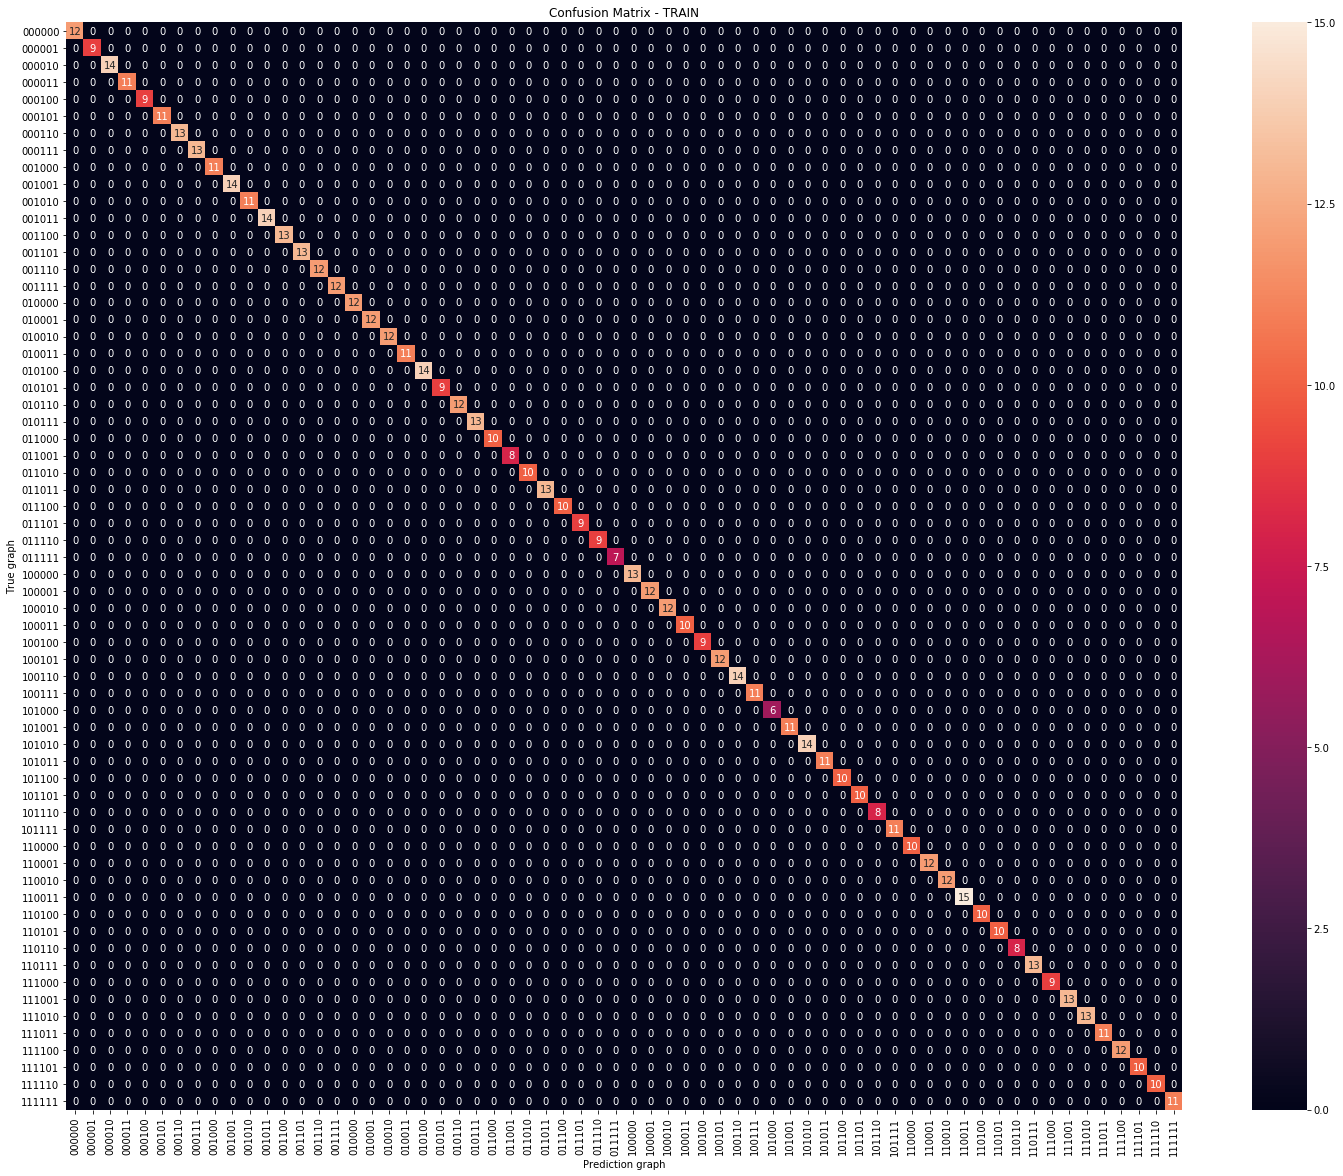

In [145]:
ruta_train = '../DATASET-10_6/dataset9/train9.csv'
ruta_test = '../DATASET-10_6/dataset9/test9.csv'



df_train_0, df_test_0 = elementString2Vector(ruta_train,ruta_test)

cls = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(10,10,6),random_state=1,activation='logistic')

param = cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))

#print(param)

# Train
y_train_true_str,y_train_pred_str = get_y_true_pred_2_str(df_train_0,cls)
y_train_true_vect,y_train_pred_vect = get_y_true_pred_2_vec(df_train_0,cls)

cm_train = confusion_matrix(y_train_true_str,y_train_pred_str)

plot_cm(cm_train,"TRAIN",labels)

print_report_model(y_train_true,y_train_pred,"TRAIN")




******************** TEST ******************** 


              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         6
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         1
      000100       0.50      1.00      0.67         6
      000101       1.00      0.60      0.75         5
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         4
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         4
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         8
      001111       1.00      1.00      1.00         2
      010000       1.00      

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


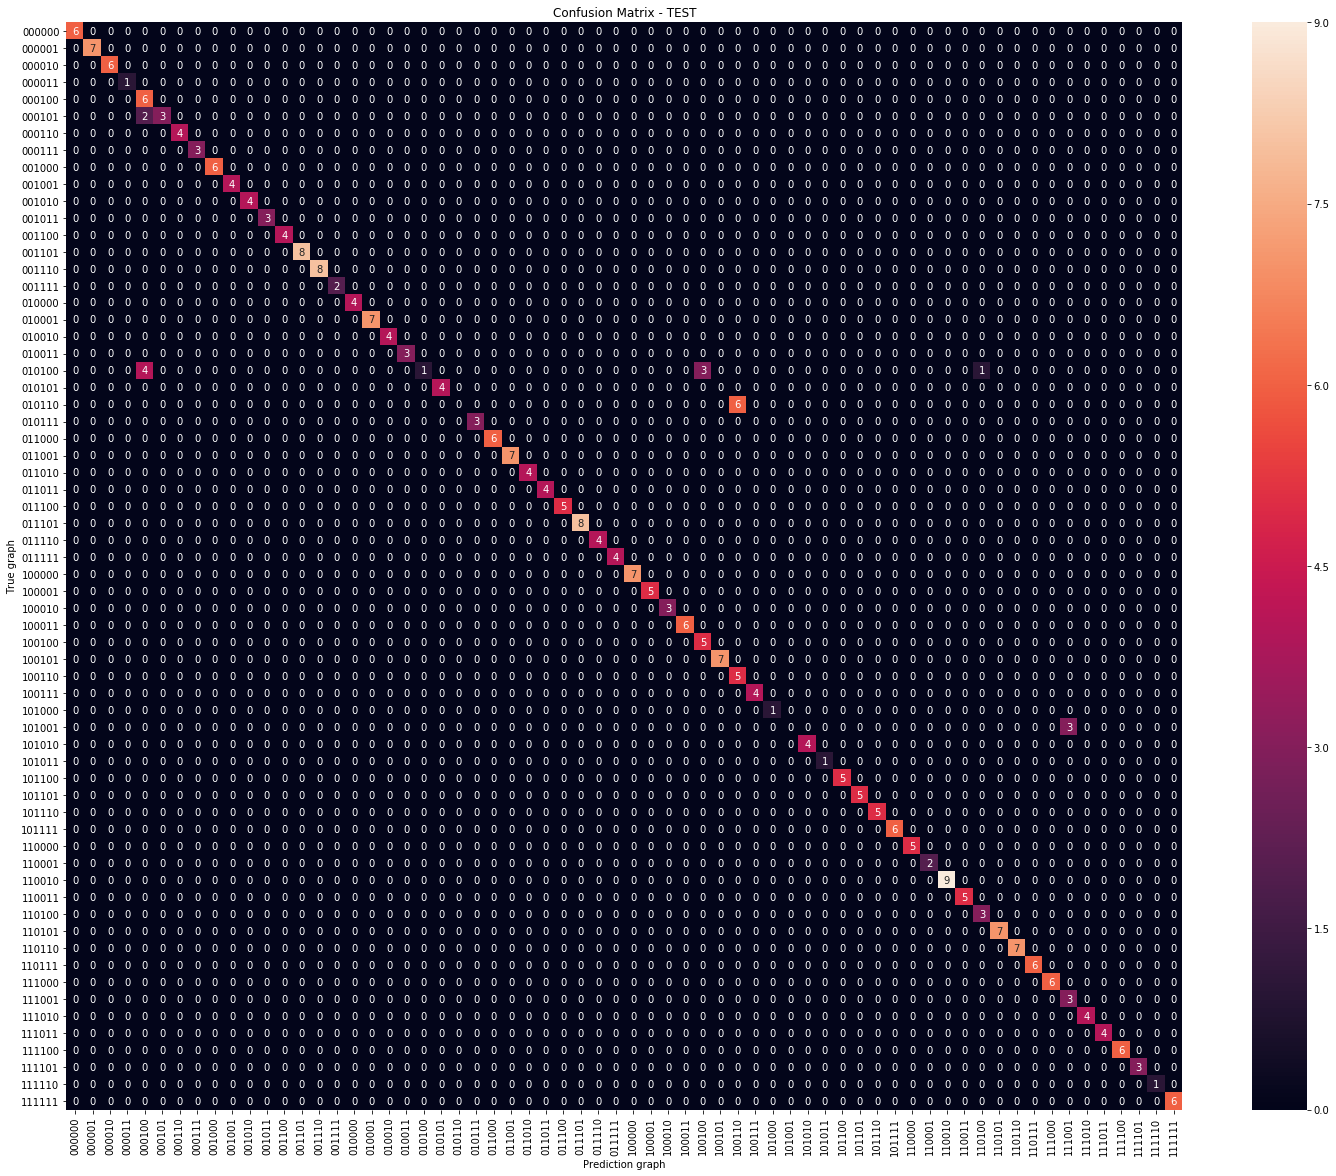

In [146]:

# Test
y_test_true_str,y_test_pred_str = get_y_true_pred_2_str(df_test_0,cls)
y_test_true_vect,y_test_pred_vect = get_y_true_pred_2_vec(df_test_0,cls)

cm_test = confusion_matrix(y_test_true,y_test_pred)

plot_cm(cm_test,"TEST",labels)

print_report_model(y_test_true,y_test_pred,"TEST")



nn_train_ha_9 = sum(np.diag(1-cdist(np.array(list(df_train_0['sub_graph'])), y_train_pred_vect, 'hamming')))/len(y_train_pred_vect)
nn_train_ac_9 = accuracy_score( np.array(list(df_train_0['sub_graph'])) ,  y_train_pred_vect ) 

nn_test_ha_9 = sum(np.diag(1-cdist(list(df_test_0['sub_graph']), y_test_pred_vect, 'hamming')))/len(y_test_pred_vect)
nn_test_ac_9 = accuracy_score( np.array(list(df_test_0['sub_graph'])) ,  y_test_pred_vect ) 



In [147]:
data_table_nn=[]
data_table_nn.append(("dataset0",nn_train_ac_0,nn_train_ha_0,nn_test_ac_0,nn_test_ha_0,"-----"))
data_table_nn.append(("dataset1",nn_train_ac_1,nn_train_ha_1,nn_test_ac_1,nn_test_ha_1,"-----"))
data_table_nn.append(("dataset2",nn_train_ac_2,nn_train_ha_2,nn_test_ac_2,nn_test_ha_2,"-----"))
data_table_nn.append(("dataset3",nn_train_ac_3,nn_train_ha_3,nn_test_ac_3,nn_test_ha_3,"-----"))
data_table_nn.append(("dataset4",nn_train_ac_4,nn_train_ha_4,nn_test_ac_4,nn_test_ha_4,"-----"))
data_table_nn.append(("dataset5",nn_train_ac_5,nn_train_ha_5,nn_test_ac_5,nn_test_ha_5,"-----"))
data_table_nn.append(("dataset6",nn_train_ac_6,nn_train_ha_6,nn_test_ac_6,nn_test_ha_6,"-----"))
data_table_nn.append(("dataset7",nn_train_ac_7,nn_train_ha_7,nn_test_ac_7,nn_test_ha_7,"-----"))
data_table_nn.append(("dataset8",nn_train_ac_8,nn_train_ha_8,nn_test_ac_8,nn_test_ha_8,"-----"))
data_table_nn.append(("dataset9",nn_train_ac_9,nn_train_ha_9,nn_test_ac_9,nn_test_ha_9,"-----"))

In [148]:
print("funcion de activacion: logistic -> f(x) = 1 / (1 + exp(-x)).")
display(pd.DataFrame(data_table_nn,columns=["Dataset","Accuracy train","Hamming train","Accuracy test","Hamming test","N° Epocas"]))

funcion de activacion: logistic -> f(x) = 1 / (1 + exp(-x)).


Dataset  Accuracy train  Hamming train  Accuracy test  Hamming test  \
0  dataset0        0.773743       0.962291       0.746753      0.957792   
1  dataset1        0.828212       0.971369       0.775974      0.962662   
2  dataset2        0.736034       0.956006       0.730519      0.955087   
3  dataset3        0.622905       0.937151       0.564935      0.927489   
4  dataset4        0.987430       0.997905       0.977273      0.996212   
5  dataset5        1.000000       1.000000       1.000000      1.000000   
6  dataset6        0.635475       0.939246       0.597403      0.932900   
7  dataset7        0.899441       0.983240       0.912338      0.985390   
8  dataset8        0.900838       0.970903       0.853896      0.955087   
9  dataset9        1.000000       1.000000       1.000000      1.000000   

  N° Epocas  
0     -----  
1     -----  
2     -----  
3     -----  
4     -----  
5     -----  
6     -----  
7     -----  
8     -----  
9     -----

|          	|                	|      TRAIN     	|               	|      TEST     	|              	|   N°   	|
|:--------:	|:--------------:	|:--------------:	|:-------------:	|:-------------:	|:------------:	|:------:	|
|**DATASET**|    **MODEL**     	|**Accuracy train** | **Hamming train**	| **Accuracy test**	|**Hamming test**| **Epocas** 	|
| dataset0 	|  Hypernetwork  	|    1.000000    	|    1.000000   	|    1.000000   	|   1.000000   	|  14773 	|
|          	| Neural network 	|    0.773743    	|    0.962291   	|    0.746753   	|   0.957792   	|  ----- 	|
| dataset1 	|  Hypernetwork  	|    0.969274    	|    0.995084   	|    0.967532   	|   0.994805   	|  30000 	|
|          	| Neural network 	|    0.828212    	|    0.971369   	|    0.775974   	|   0.962662   	|  ----- 	|
| dataset2 	|  Hypernetwork  	|    1.000000    	|    1.000000   	|    1.000000   	|   1.000000   	|  10564 	|
|          	| Neural network 	|    0.736034    	|    0.956006   	|    0.730519   	|   0.955087   	|  ----- 	|
| dataset3 	|  Hypernetwork  	|    0.997207    	|    0.999078   	|    0.993506   	|   0.997305   	|  14327 	|
|          	| Neural network 	|    0.622905    	|    0.937151   	|    0.564935   	|   0.927489   	|  ----- 	|
| dataset4 	|  Hypernetwork  	|    0.983240    	|    0.997318   	|    0.987013   	|   0.997922   	|  29588 	|
|          	| Neural network 	|    0.987430    	|    0.997905   	|    0.977273   	|   0.996212   	|  ----- 	|
| dataset5 	|  Hypernetwork  	|    0.487430    	|    0.913715   	|    0.425325   	|   0.900325   	|  30000 	|
|          	| Neural network 	|    1.000000    	|    1.000000   	|    1.000000   	|   1.000000   	|  ----- 	|
| dataset6 	|  Hypernetwork  	|    1.000000    	|    1.000000   	|    1.000000   	|   1.000000   	|  15459 	|
|          	| Neural network 	|    0.635475    	|    0.939246   	|    0.597403   	|   0.932900   	|  ----- 	|
| dataset7 	|  Hypernetwork  	|    1.000000    	|    1.000000   	|    1.000000   	|   1.000000   	|  7866  	|
|          	| Neural network 	|    0.899441    	|    0.983240   	|    0.912338   	|   0.985390   	|  ----- 	|
| dataset8 	|  Hypernetwork  	|    1.000000    	|    1.000000   	|    1.000000   	|   1.000000   	|  7752  	|
|          	| Neural network 	|    0.900838    	|    0.970903   	|    0.853896   	|   0.955087   	|  ----- 	|
| dataset9 	|  Hypernetwork  	|    1.000000    	|    1.000000   	|    1.000000   	|   1.000000   	|  14187 	|
|          	| Neural network 	|    1.000000    	|    1.000000   	|    1.000000   	|   1.000000   	|  ----- 	|

$$



% Please add the following required packages to your document preamble:
% \usepackage{multirow}
% \usepackage{graphicx}
\begin{table}[]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{cc|c|c|c|c|c|}
\cline{3-7}
 &  & \multicolumn{2}{c|}{TRAIN} & \multicolumn{2}{c|}{TEST} &  \\ \hline
\multicolumn{1}{|c|}{DATASET} & MODEL & Accuracy train & Hamming train & Accuracy test & Hamming test & N° Epocas \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{dataset0}} & Hypernetwork & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 14773 \\ \cline{2-7} 
\multicolumn{1}{|c|}{} & Neural network & 0.773743 & 0.962291 & 0.746753 & 0.957792 & ----- \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{dataset1}} & Hypernetwork & 0.969274 & 0.995084 & 0.967532 & 0.994805 & 30000 \\ \cline{2-7} 
\multicolumn{1}{|c|}{} & Neural network & 0.828212 & 0.971369 & 0.775974 & 0.962662 & ----- \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{dataset2}} & Hypernetwork & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 10564 \\ \cline{2-7} 
\multicolumn{1}{|c|}{} & Neural network & 0.736034 & 0.956006 & 0.730519 & 0.955087 & ----- \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{dataset3}} & Hypernetwork & 0.997207 & 0.999078 & 0.993506 & 0.997305 & 14327 \\ \cline{2-7} 
\multicolumn{1}{|c|}{} & Neural network & 0.622905 & 0.937151 & 0.564935 & 0.927489 & ----- \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{dataset4}} & Hypernetwork & 0.983240 & 0.997318 & 0.987013 & 0.997922 & 29588 \\ \cline{2-7} 
\multicolumn{1}{|c|}{} & Neural network & 0.987430 & 0.997905 & 0.977273 & 0.996212 & ----- \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{dataset5}} & Hypernetwork & 0.487430 & 0.913715 & 0.425325 & 0.900325 & 30000 \\ \cline{2-7} 
\multicolumn{1}{|c|}{} & Neural network & 1.000000 & 1.000000 & 1.000000 & 1.000000 & ----- \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{dataset6}} & Hypernetwork & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 15459 \\ \cline{2-7} 
\multicolumn{1}{|c|}{} & Neural network & 0.635475 & 0.939246 & 0.597403 & 0.932900 & ----- \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{dataset7}} & Hypernetwork & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 7866 \\ \cline{2-7} 
\multicolumn{1}{|c|}{} & Neural network & 0.899441 & 0.983240 & 0.912338 & 0.985390 & ----- \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{dataset8}} & Hypernetwork & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 7752 \\ \cline{2-7} 
\multicolumn{1}{|c|}{} & Neural network & 0.900838 & 0.970903 & 0.853896 & 0.955087 & ----- \\ \hline
\multicolumn{1}{|c|}{\multirow{2}{*}{dataset9}} & Hypernetwork & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 14187 \\ \cline{2-7} 
\multicolumn{1}{|c|}{} & Neural network & 1.000000 & 1.000000 & 1.000000 & 1.000000 & ----- \\ \hline
\end{tabular}%
}
\end{table}

$$

In [126]:
print("funcion de activacion: relu -> f(x) = max(0, x)")

funcion de activacion: relu -> f(x) = max(0, x)


In [123]:
display(pd.DataFrame(data_table_nn,columns=["Dataset","Accuracy train","Hamming train","Accuracy test","Hamming test","N° Epocas"]))

Dataset  Accuracy train  Hamming train  Accuracy test  Hamming test  \
0  dataset0        0.958101       0.990689       0.938312      0.984848   
1  dataset1        0.694134       0.941108       0.659091      0.933983   
2  dataset2        0.513966       0.906192       0.454545      0.890152   
3  dataset3        0.706704       0.942737       0.636364      0.929654   
4  dataset4        0.610335       0.925279       0.516234      0.913420   
5  dataset5        0.501397       0.906657       0.522727      0.915043   
6  dataset6        0.643855       0.936220       0.600649      0.925325   
7  dataset7        0.553073       0.919227       0.545455      0.920455   
8  dataset8        0.953911       0.989758       0.935065      0.985390   
9  dataset9        0.641061       0.930866       0.610390      0.930195   

  N° Epocas  
0     -----  
1     -----  
2     -----  
3     -----  
4     -----  
5     -----  
6     -----  
7     -----  
8     -----  
9     -----

------

In [160]:

cls?

In [161]:
cls.fit(list(df_train_0['graph']),list(df_train_0['sub_graph']))


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 6), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)